# FAA 1462 Pareja 10. Práctica 3 REGRESIÓN LOGÍSTICA Y ANÁLISIS ROC
## Kevin de la Coba Malam

En este documento se mostrarán los resultados del clasificador **Regresión Logística** usando diferentes *épocas* y *constantes de aprendizaje*. Posteriormente, se hará un **analísis ROC** de todos los clasificadores implementados. En este análisis se mostrarán **puntos sobre el espacio ROC** y una **curva ROC**.

En está practica, se han usado ambos tipos de validaciones, cruzada y simple. En concreto, con la validación cruzada se usan los valores K: **4, 6, 8, 10**. Para la validación simple se usán valores para el %: **25, 20, 15, 10**.

## Modificaciones
- Corrección en el clasificador K-NN. En el método *clasificar* siempre se normalizaban los datos, ahora solo se hace cuando el objeto tiene el atributo norm a true.


In [1]:
# Para esconder los warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from Datos import Datos
import utils
import matplotlib.pyplot as plt

# Cargamos datos
pima = Datos("ConjuntosDatos/pima-indians-diabetes__a.data")
wdbc = Datos("ConjuntosDatos/wdbc__a.data")

## 1. Resultados Regresión Logística (Implementación propia)
A continuación se mostraran tablas en las cuales se realizan tests sobre los conjuntos de datos *pima* y *wdbc*. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-2000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 2000).

In [2]:
errorMedioPimaVC, errorMedioPimaVS, errorMedioWDBCVC, errorMedioWDBCVS = utils.RL_test(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.416667		0.392857
Validación Cruzada K-Folds=4			0.435185		0.446429
Validación Simple 20%				0.419048		0.454545
Validación Cruzada K-Folds=6			0.453704		0.537037
Validación Simple 15%				0.395833		0.541667
Validación Cruzada K-Folds=8			0.461538		0.446429
Validación Simple 10%				0.430000		0.480000
Validación Cruzada K-Folds=10			0.430000		0.440000
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.305556		0.482143
Validación Cruzada K-Folds=4			0.388889		0.517857
Validación Simple 20%				0.419048		0.527273
Validación Cruzada K-Folds=6			0.444444		0.500000
Validación Simple 15%				0.416667		0.437500
Validación Cruzada K-Folds=8			0.403846		0.446429
Validación Simple 10%				0.320000		0.620000
Validación Cruzada K-Folds=10			0.420000		0.460000
Test Épocas=10 Constante ap

Validación Simple 20%				0.380952		0.400000
Validación Cruzada K-Folds=6			0.416667		0.481481
Validación Simple 15%				0.427083		0.458333
Validación Cruzada K-Folds=8			0.442308		0.357143
Validación Simple 10%				0.390000		0.520000
Validación Cruzada K-Folds=10			0.370000		0.440000

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=70*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=70 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.388889		0.464286
Validación Cruzada K-Folds=4			0.388889		0.517857
Validación Simple 20%				0.361905		0.418182
Validación Cruzada K-Folds=6			0.398148		0.481481
Validación Simple 15%				0.343750		0.416667
Validación Cruzada K-Folds=8			0.365385		0.375000
Validación Simple 10%				0.350000		0.480000
Validación Cruzada K-Folds=10			0.340000		0.360000
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.444444		0.446429
Validación Cruzada K-Folds=4			0.388889		0.482143
Validación Simple 20%				0.

### 1.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento.
#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=0.5

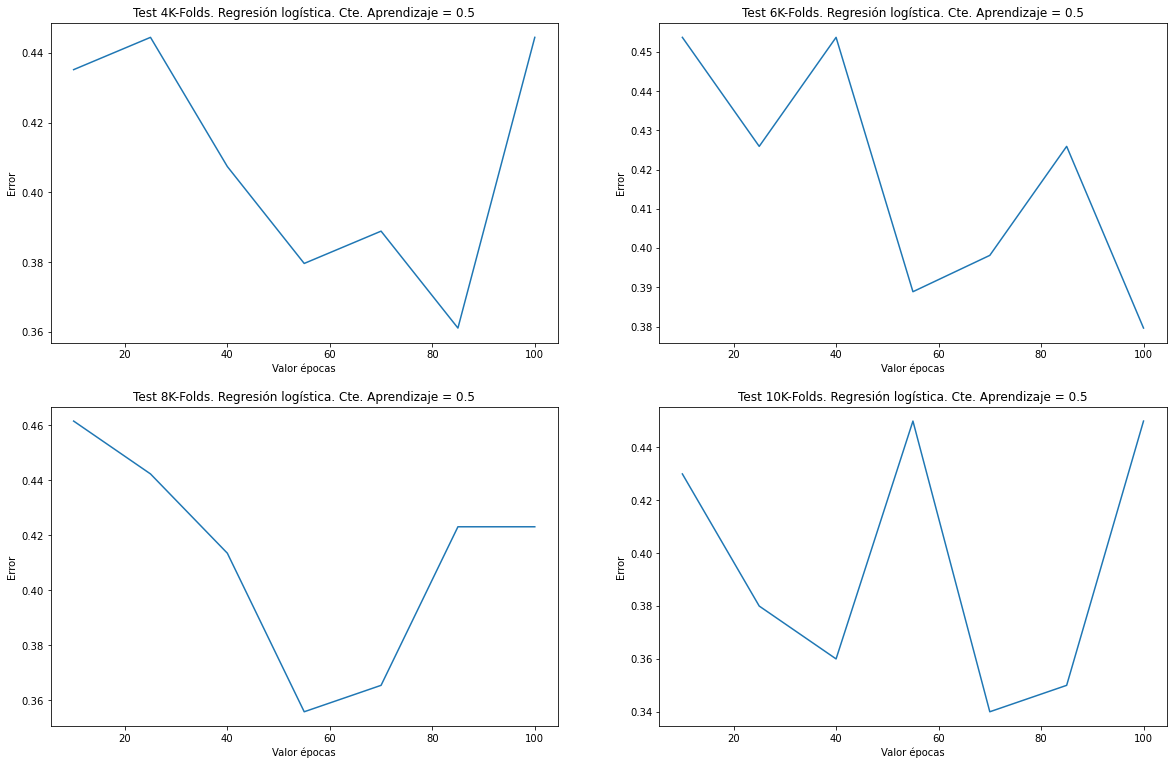

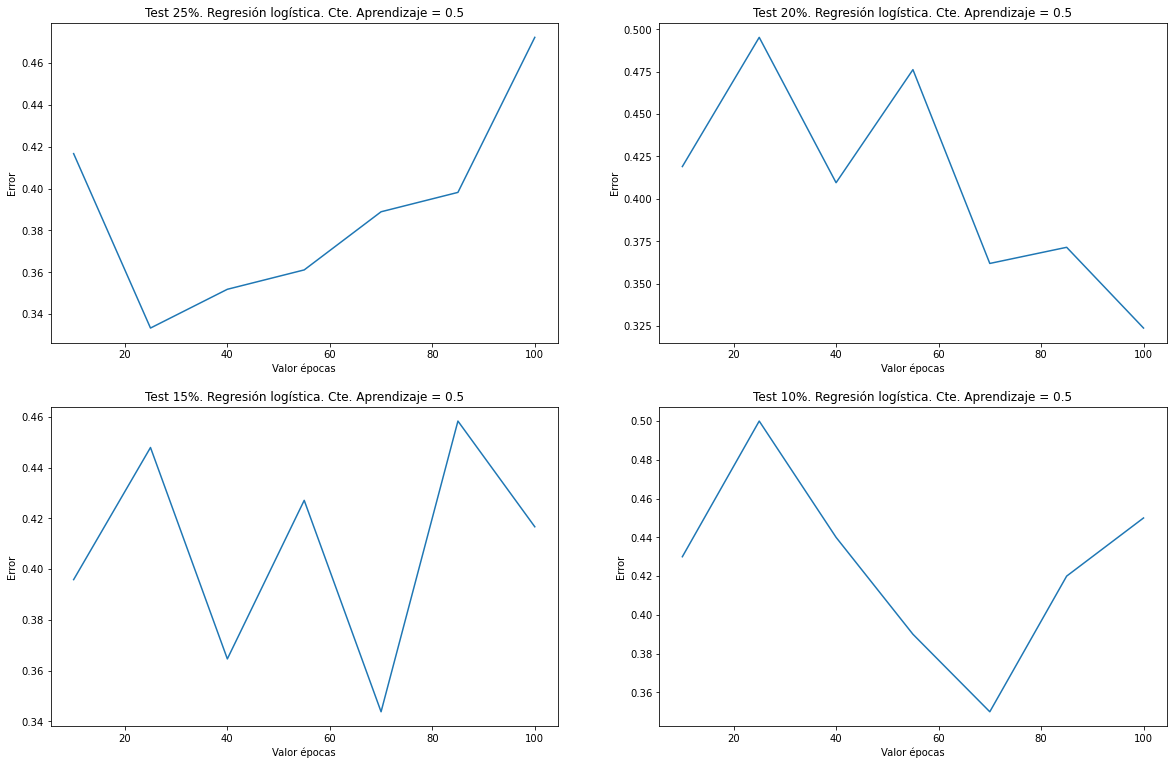

In [3]:
utils.plot_epoch(errorMedioPimaVC, 0.5, False)
utils.plot_epoch(errorMedioPimaVS, 0.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.0

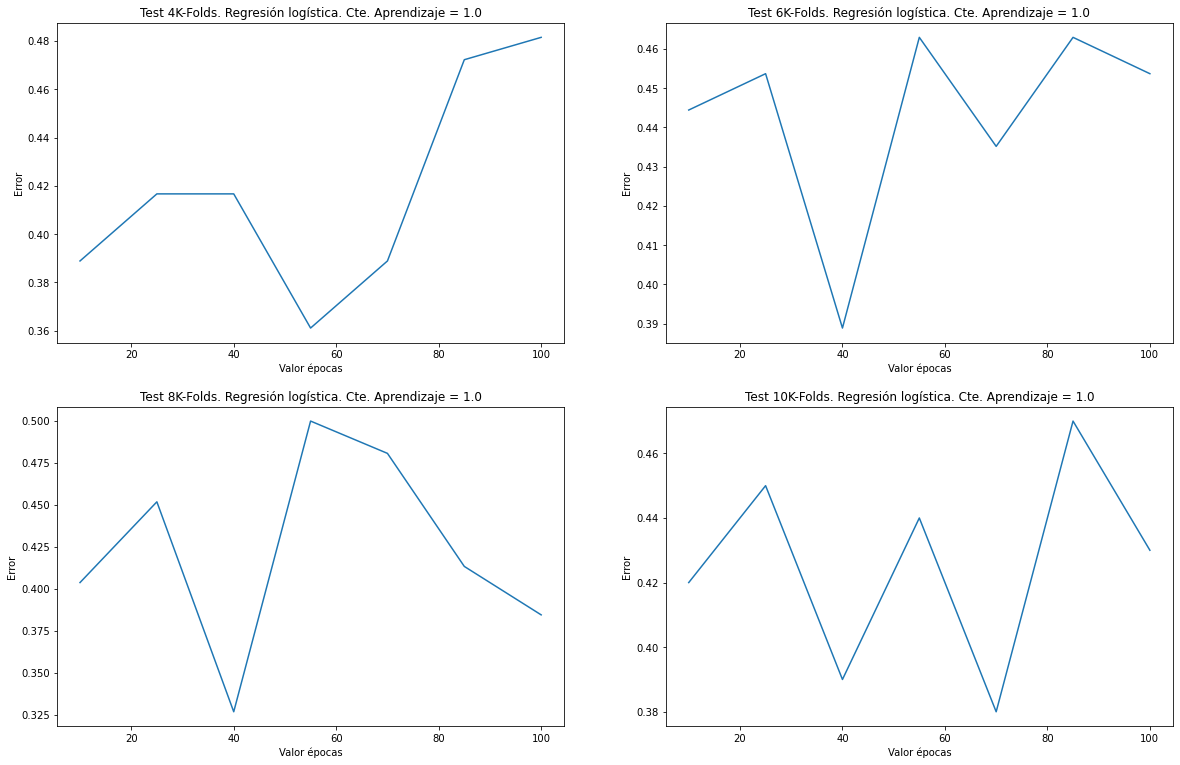

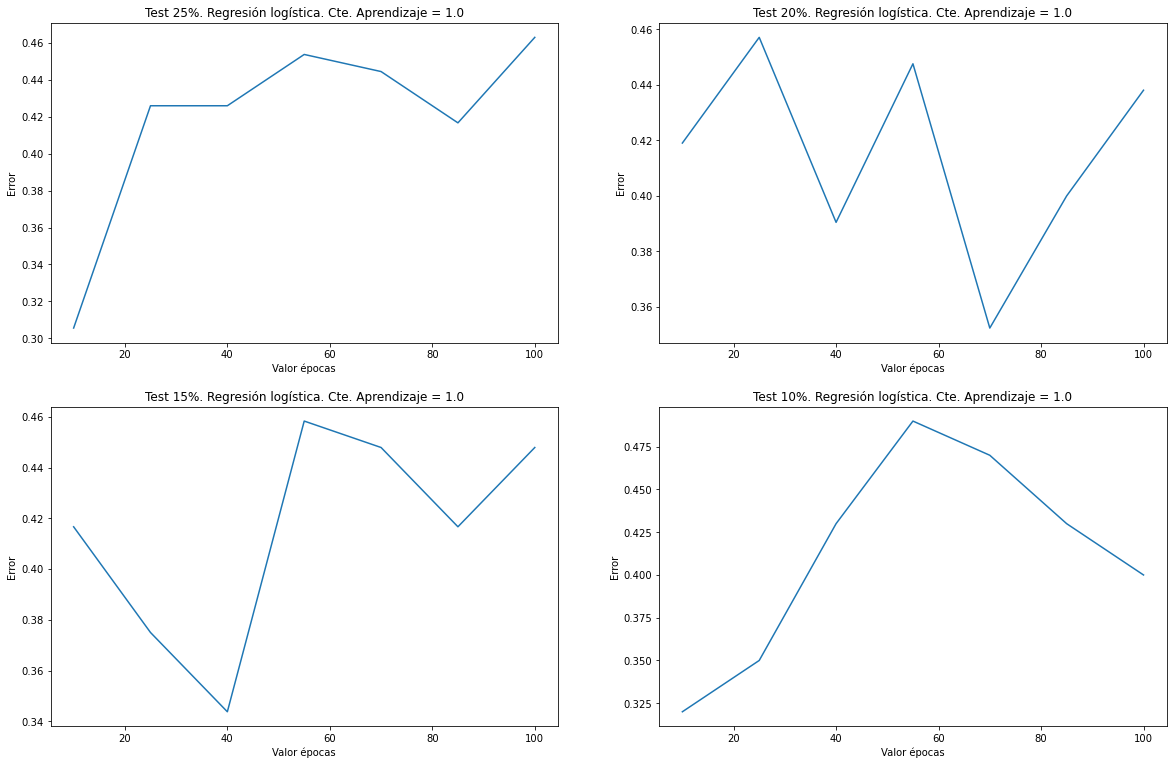

In [4]:
utils.plot_epoch(errorMedioPimaVC, 1.0, False)
utils.plot_epoch(errorMedioPimaVS, 1.0, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=1.5

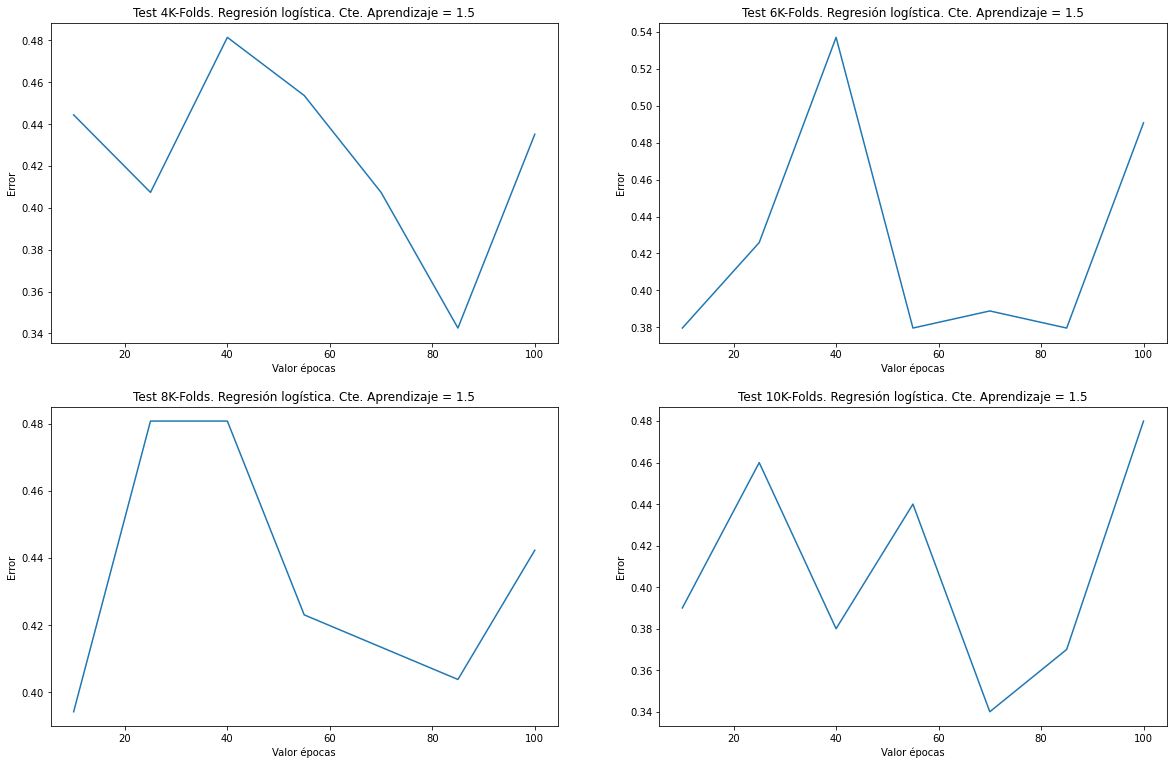

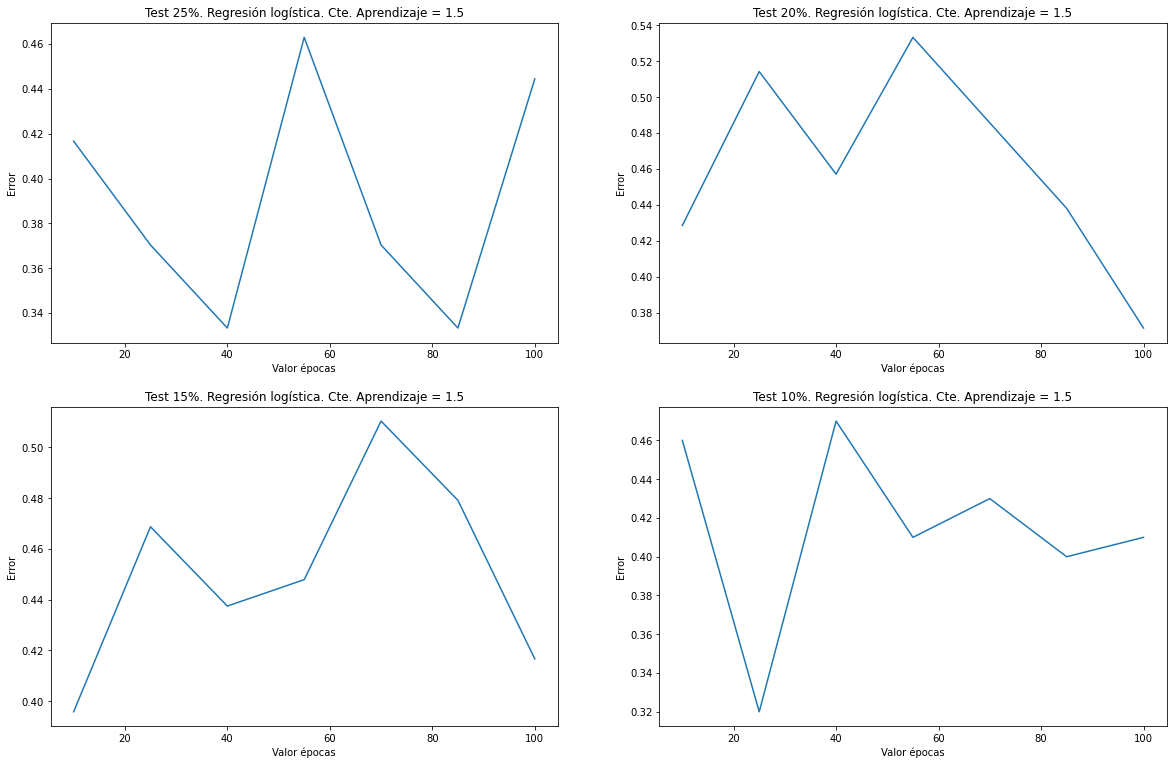

In [5]:
utils.plot_epoch(errorMedioPimaVC, 1.5, False)
utils.plot_epoch(errorMedioPimaVS, 1.5, True)

#### 1.1.1 *Pima-Indians-Diabetes* Cte. aprendizaje=2.0

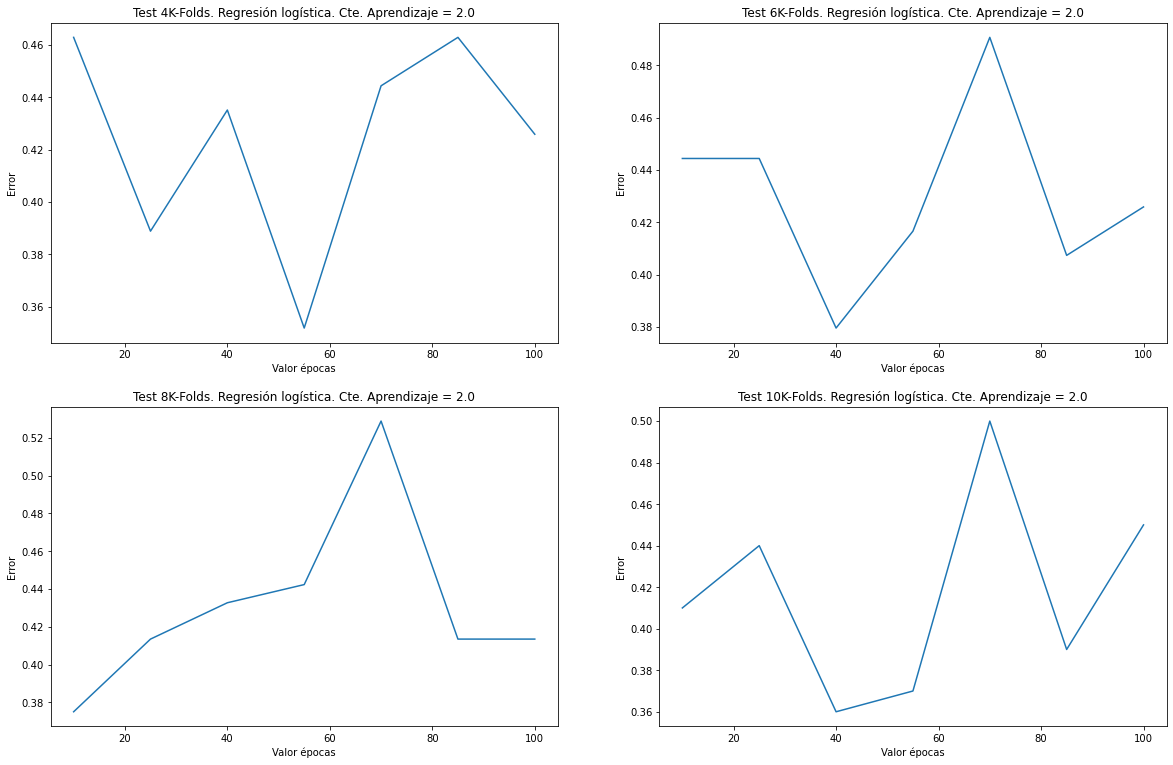

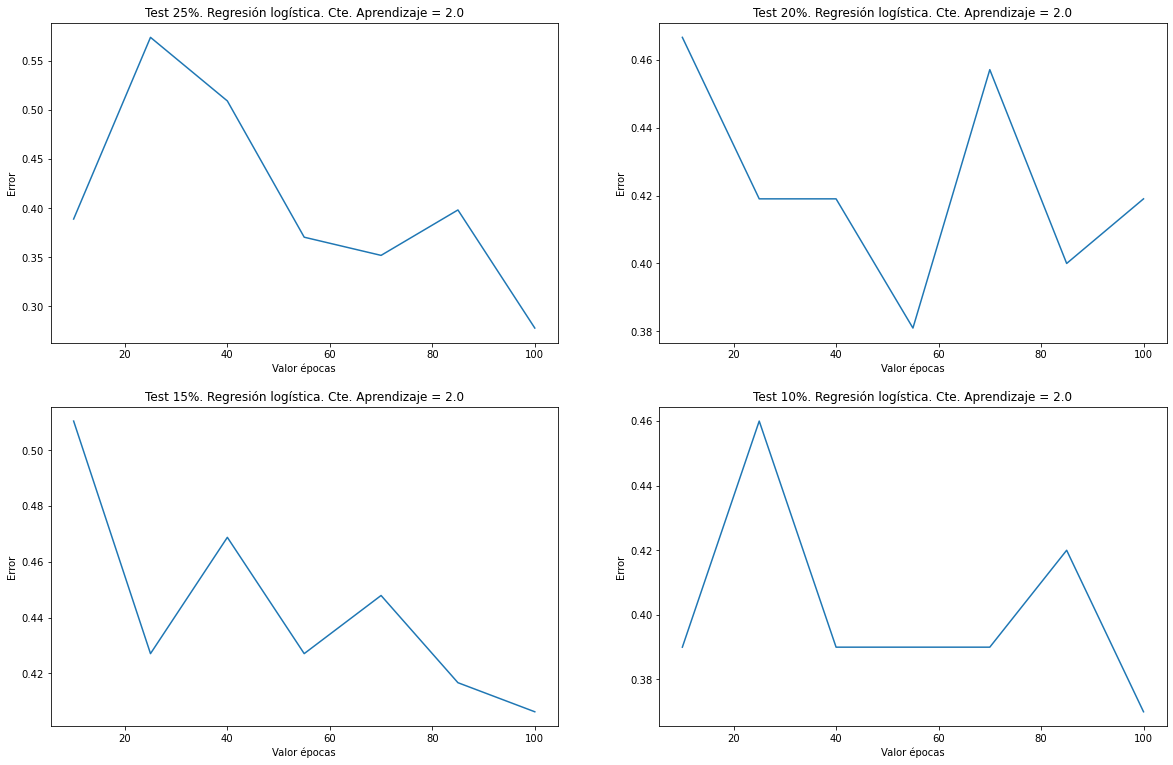

In [6]:
utils.plot_epoch(errorMedioPimaVC, 2.0, False)
utils.plot_epoch(errorMedioPimaVS, 2.0, True)

# EXPLICACIÓN EVOLUCION DE EPOCH EN PIMA
#### 1.1.2 *WDBC* Cte. aprendizaje=0.5

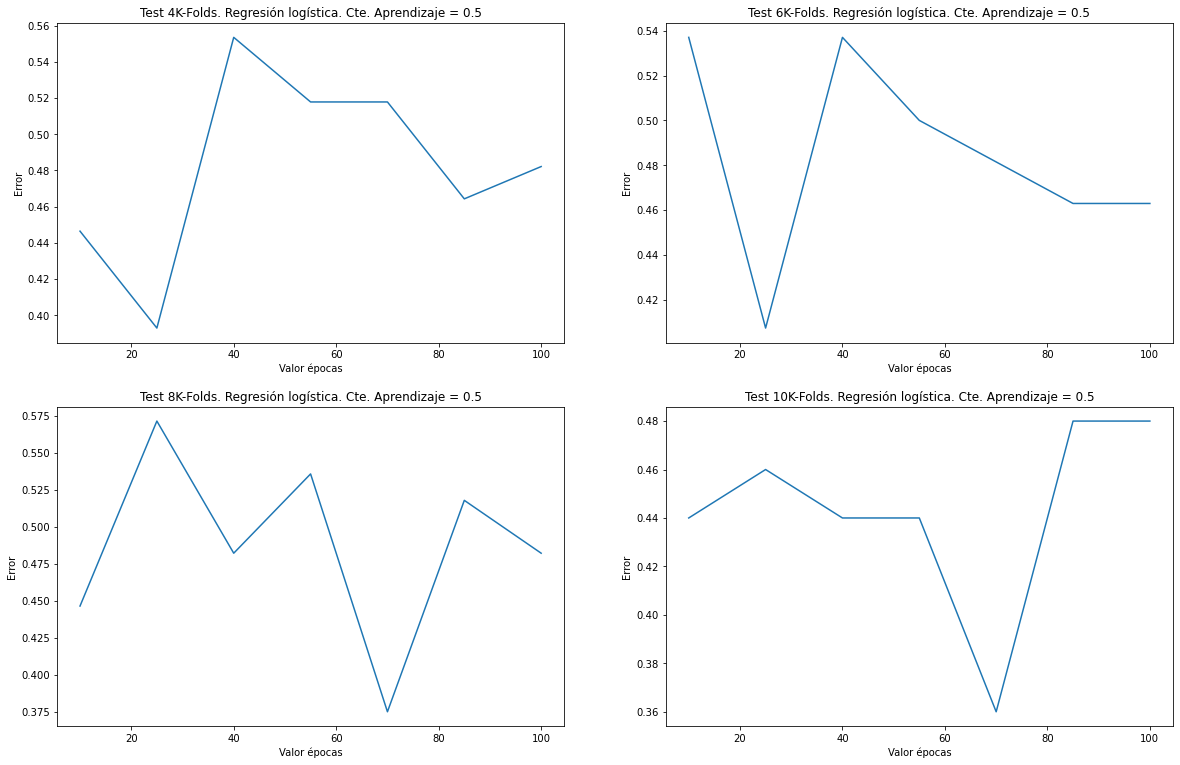

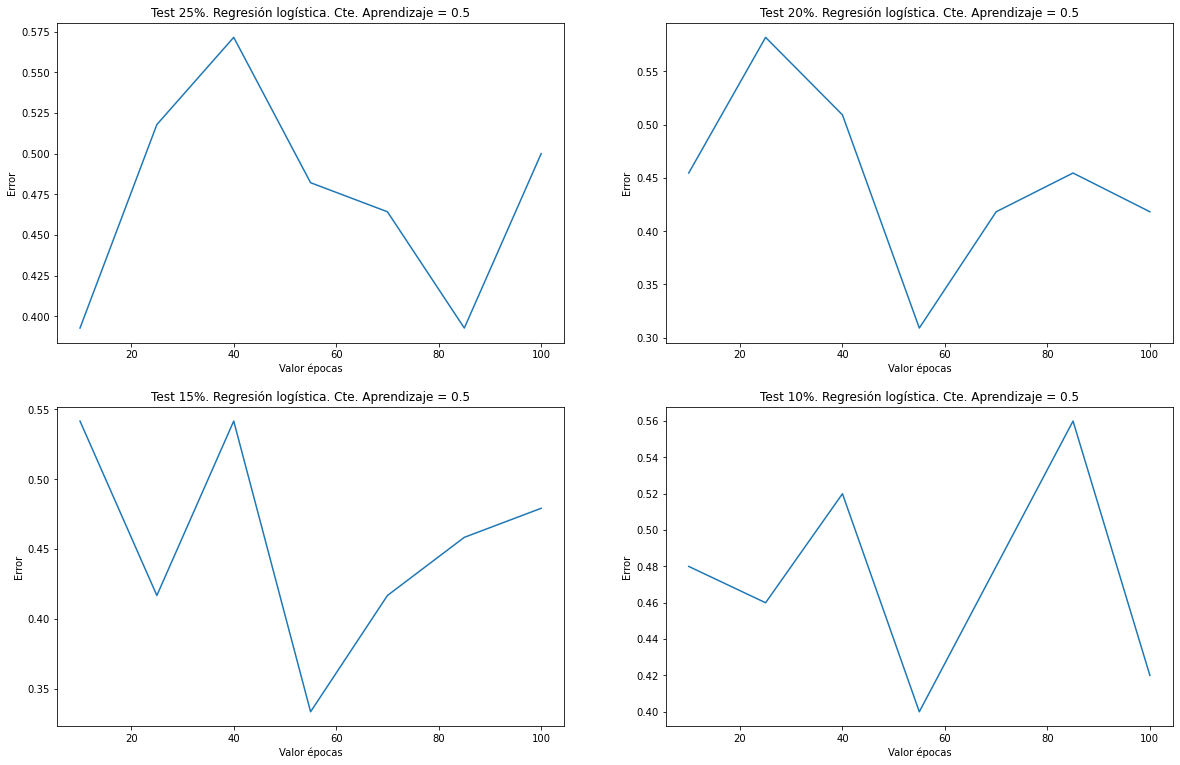

In [7]:
utils.plot_epoch(errorMedioWDBCVC, 0.5, False)
utils.plot_epoch(errorMedioWDBCVS, 0.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.0

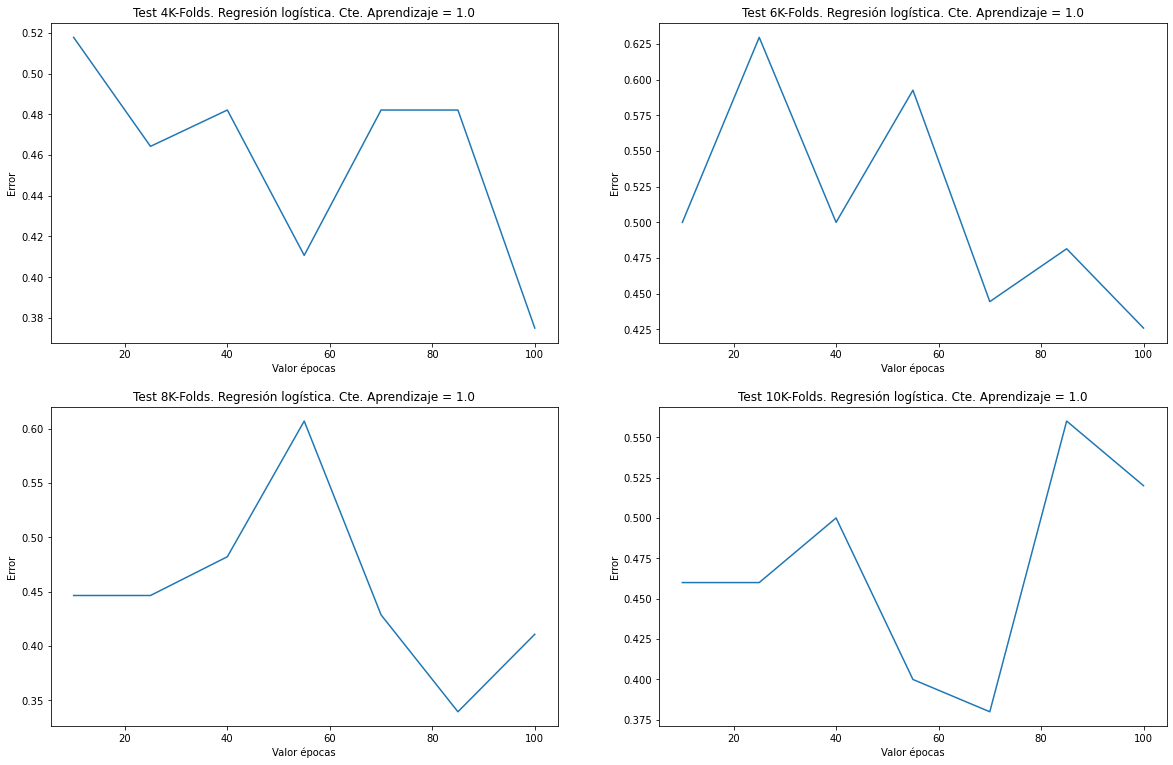

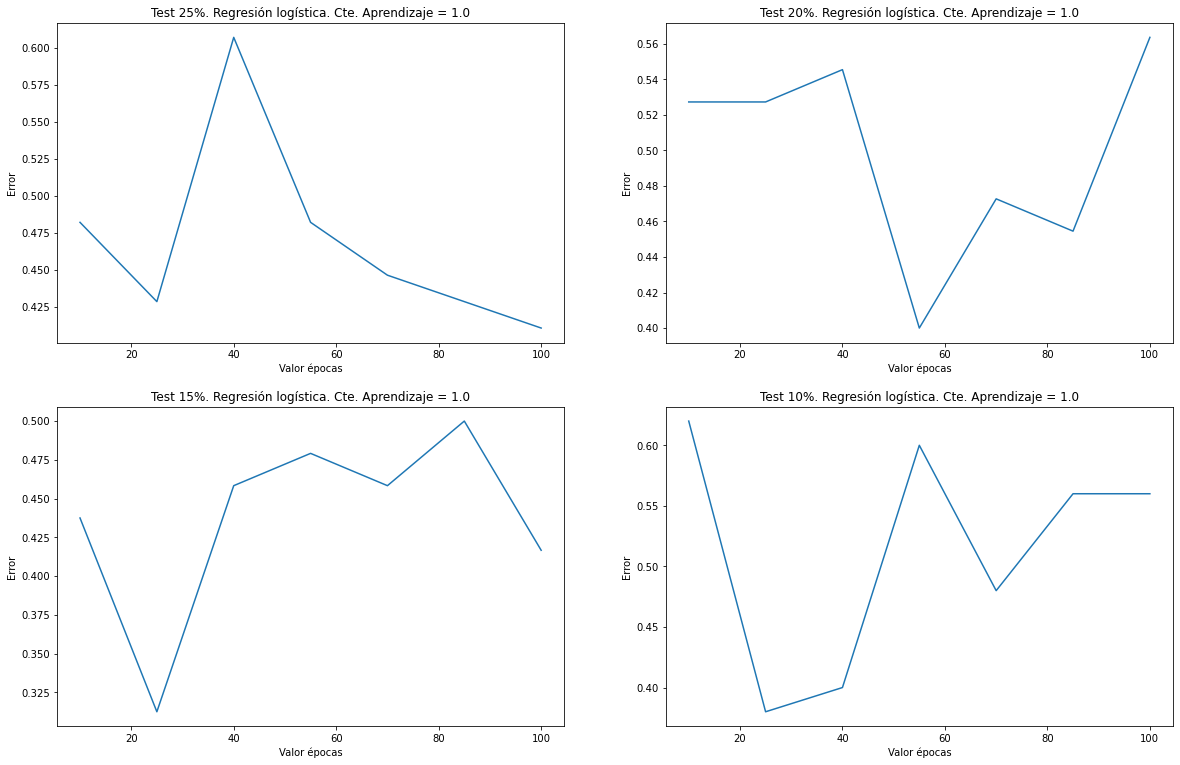

In [8]:
utils.plot_epoch(errorMedioWDBCVC, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS, 1.0, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=1.5

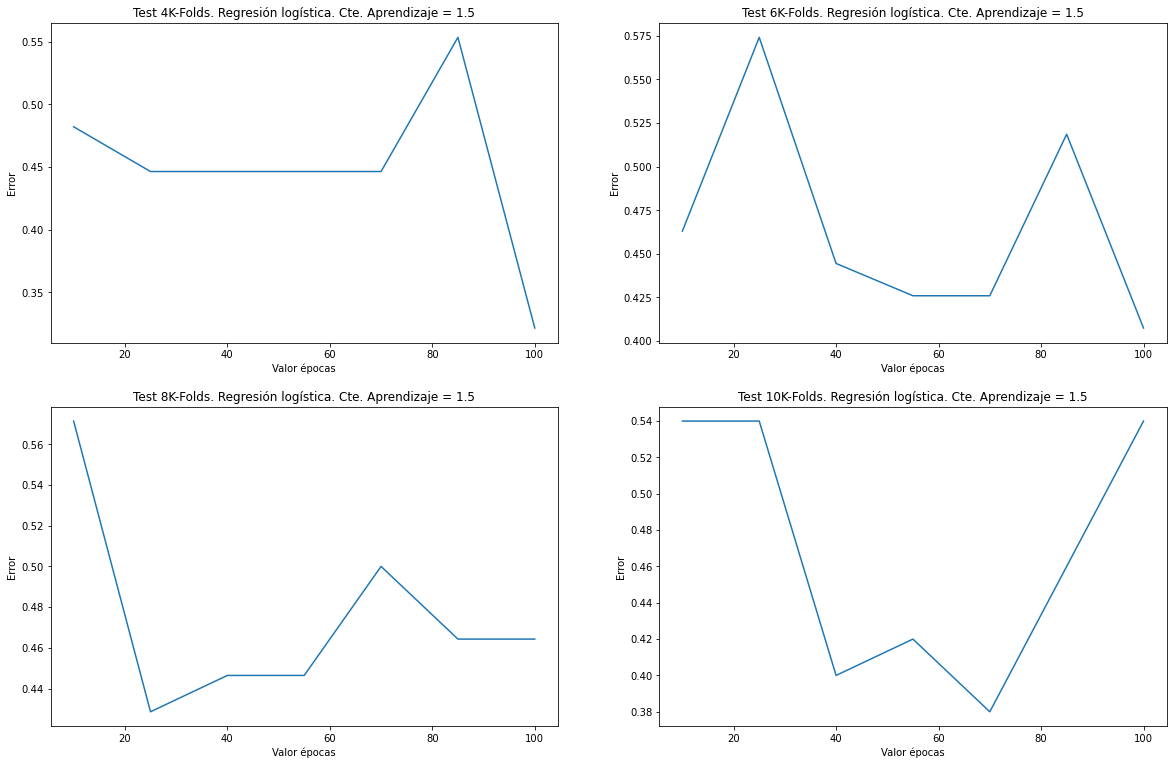

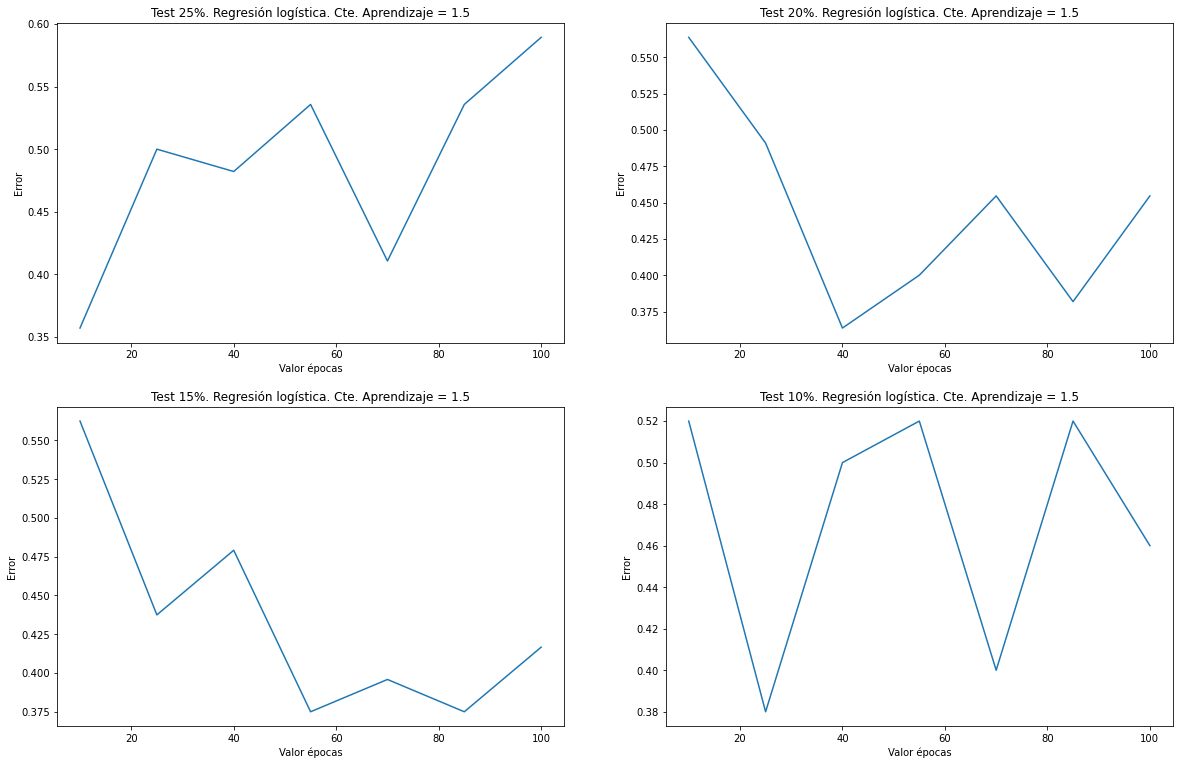

In [9]:
utils.plot_epoch(errorMedioWDBCVC, 1.5, False)
utils.plot_epoch(errorMedioWDBCVS, 1.5, True)

#### 1.1.2 *WDBC* Cte. aprendizaje=2.0

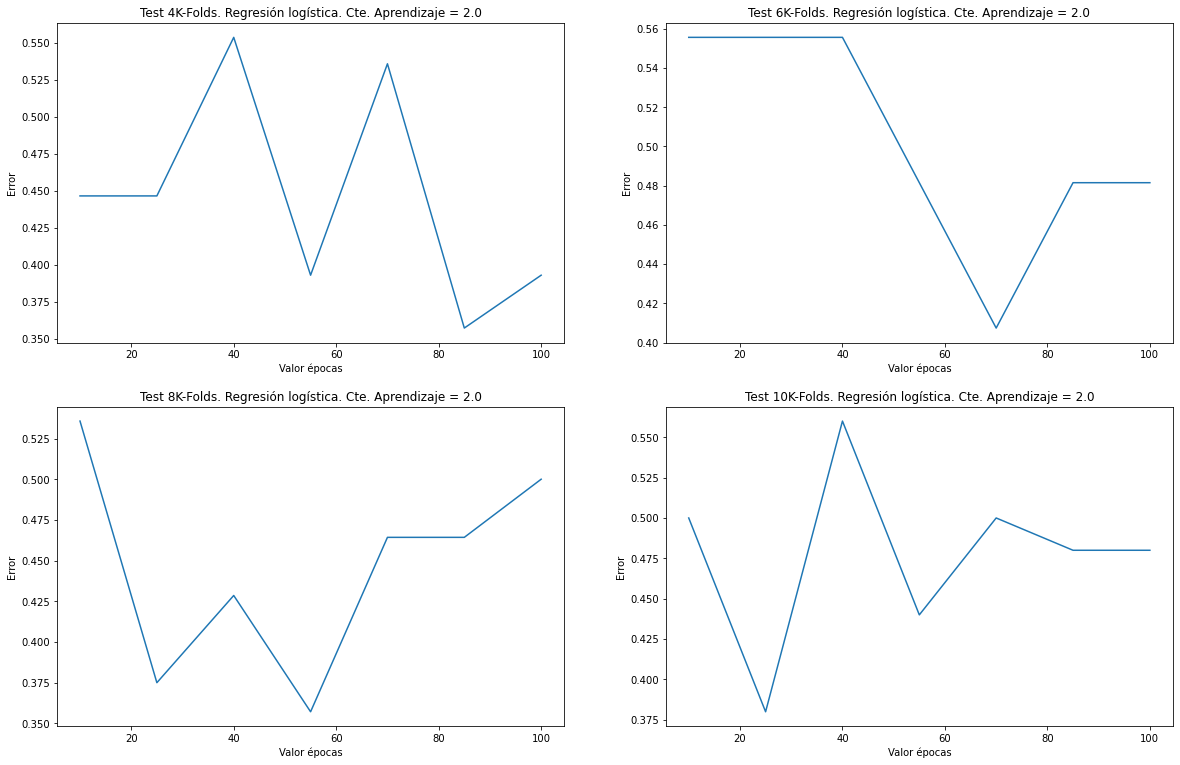

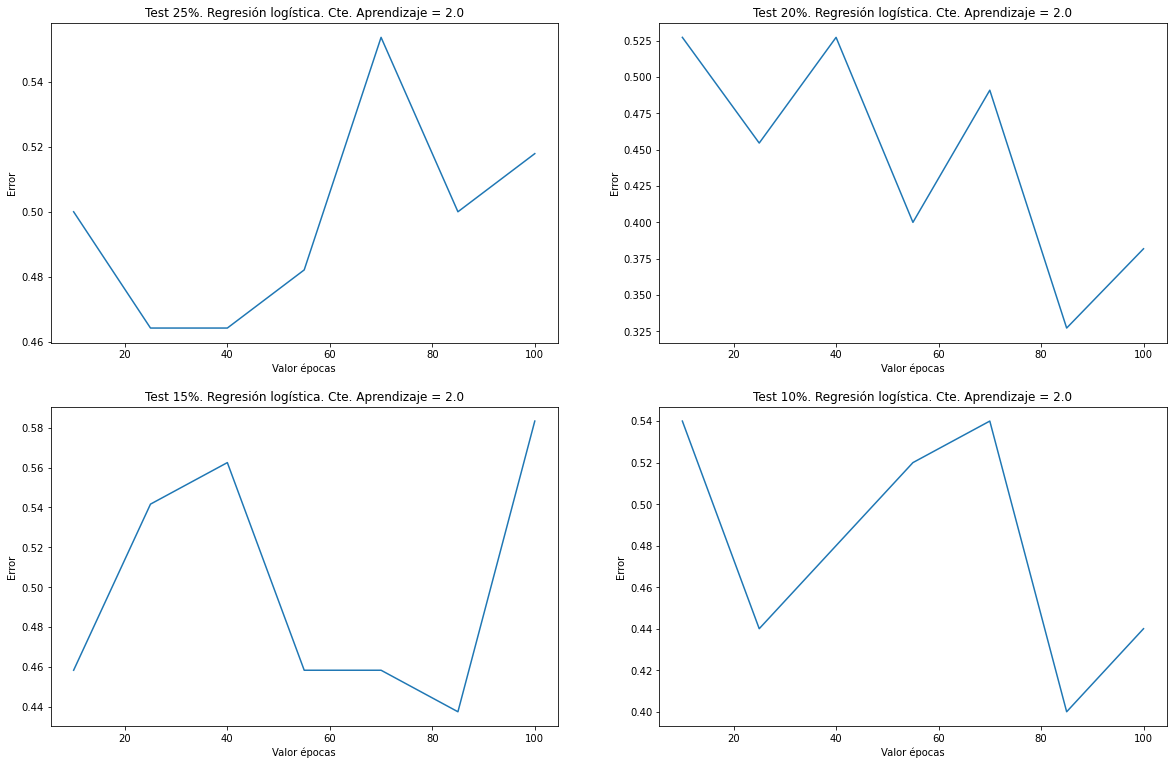

In [10]:
utils.plot_epoch(errorMedioWDBCVC, 2.0, False)
utils.plot_epoch(errorMedioWDBCVS, 2.0, True)

# EXPLICACIÓN EVOLUCION DE EPOCH EN WDBC
### 1.2 Efecto de la Cte. de aprendizaje
Ahora veremos como se desarrolla el error en base al valor que se le da a la constante de aprendizaje. Para esto se usará un determinado número de épocas (donde se da un menor error), de esta forma se vera el impacto de la cte. 

#### 1.2.1 *Pima-Indians-Diabetes* Épocas = 100 CAMBIAR ÉPOCAS

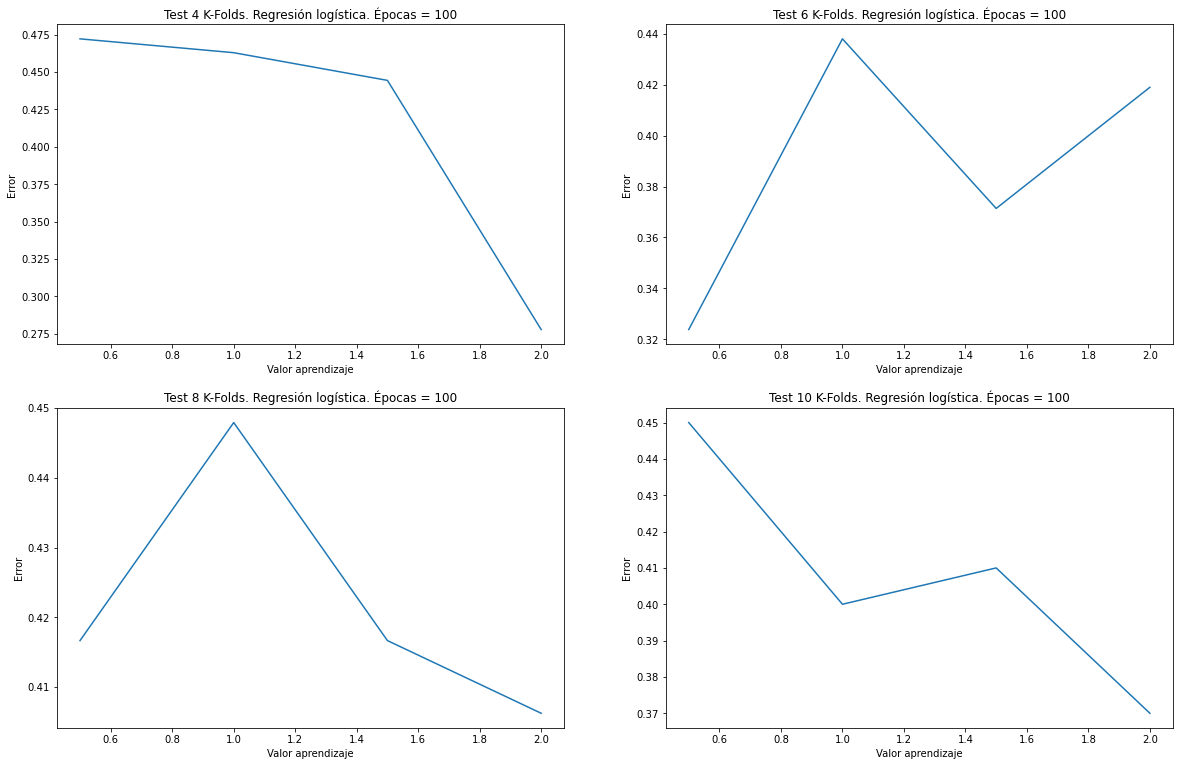

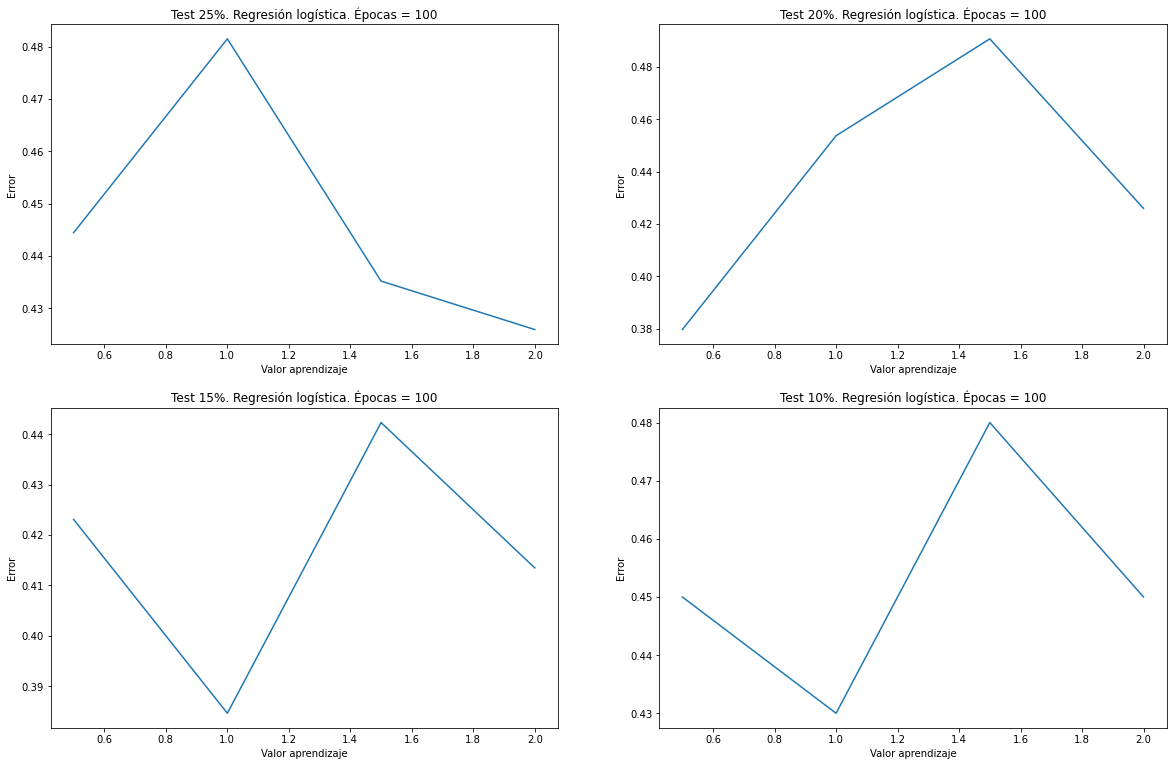

In [11]:
utils.plot_aprendizaje(errorMedioPimaVS, 100, False)
utils.plot_aprendizaje(errorMedioPimaVC, 100, True)

# EXPLICAR EVOLUCION DEL ERROR CON RESPECTO A LA CTE EN PIMA
#### 1.2.2 *WDBC* Épocas = 100 CAMBIAR ÉPOCAS

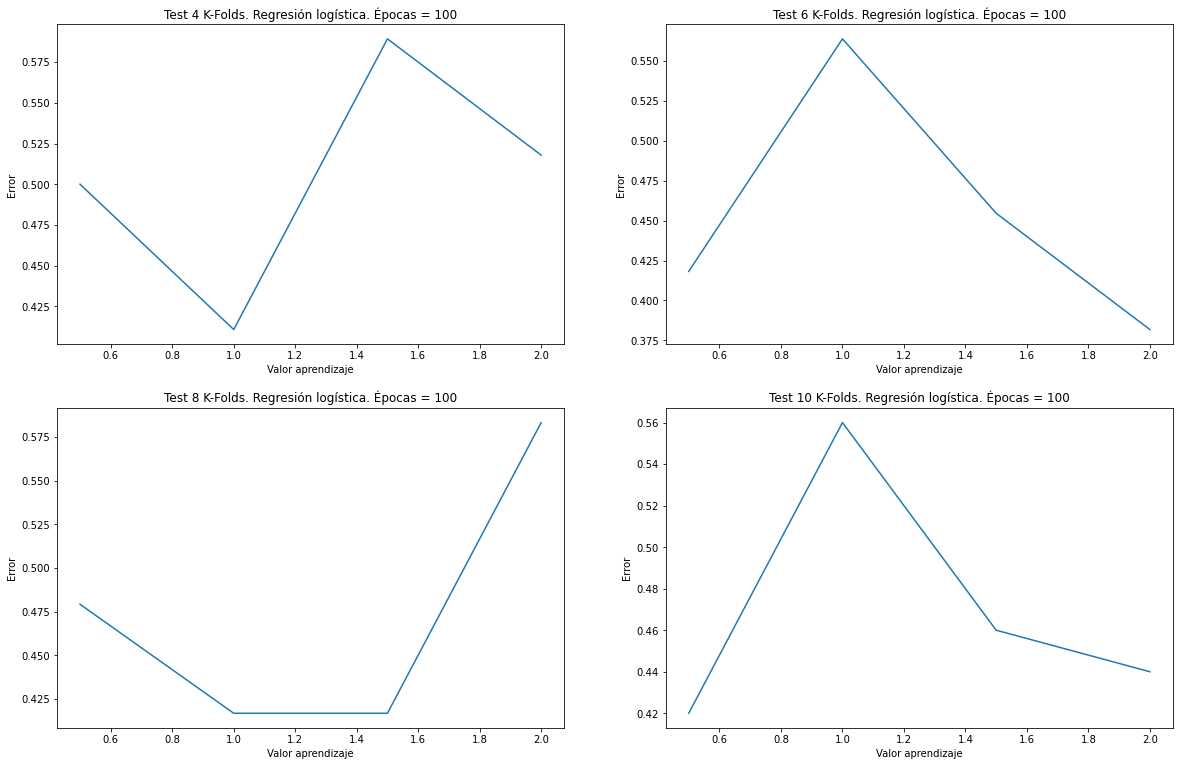

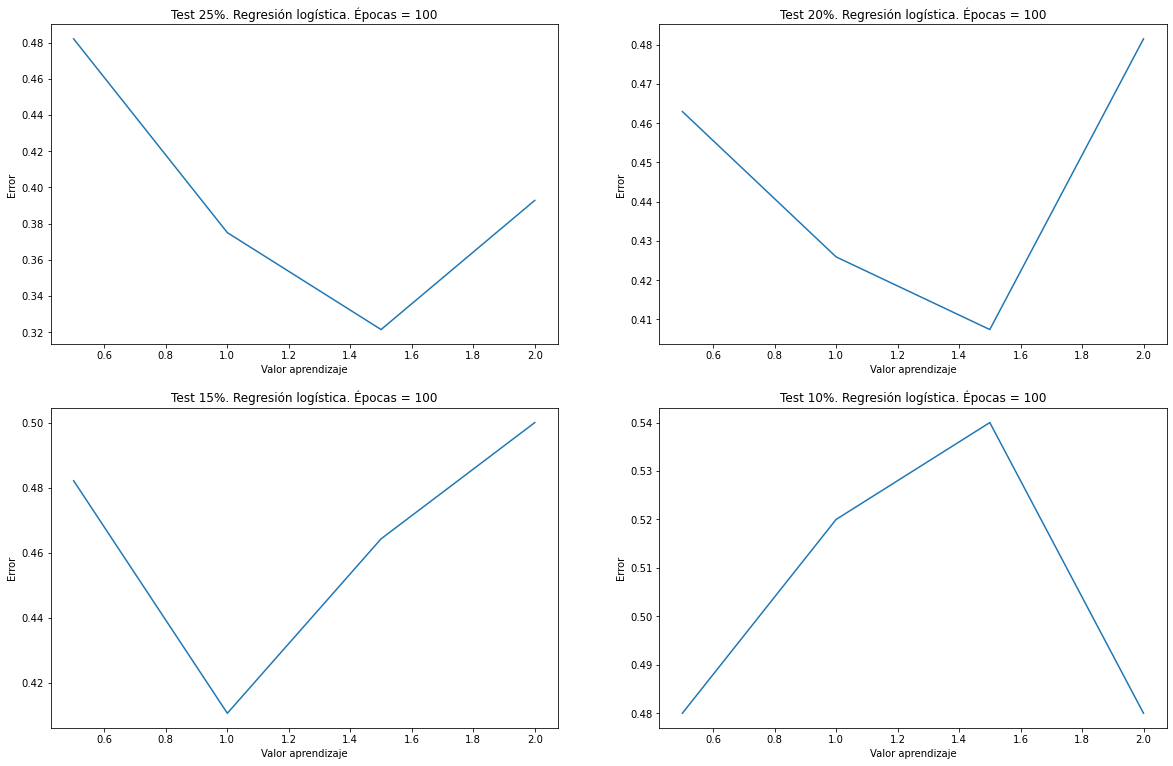

In [12]:
utils.plot_aprendizaje(errorMedioWDBCVS, 100, False)
utils.plot_aprendizaje(errorMedioWDBCVC, 100, True)

# EXPLICAR EVOLUCION DEL ERROR CON RESPECTO A LA CTE EN WDBC
#### 1.2.3 Error medio PIMA

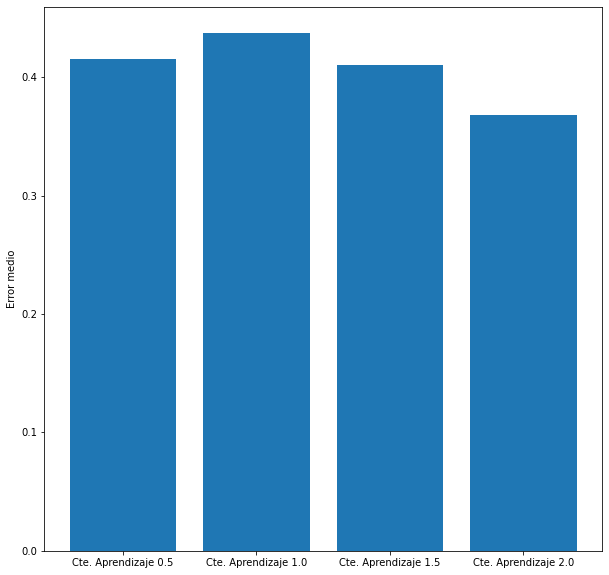

In [13]:
datos = (errorMedioPimaVS, errorMedioPimaVS)
utils.plot_histograms(datos, 100)

# EXPLICAR QUE CONSTANTE OFRECE MEJORES RESULTADOS PIMA
#### 1.2.4 Error medio WDBC

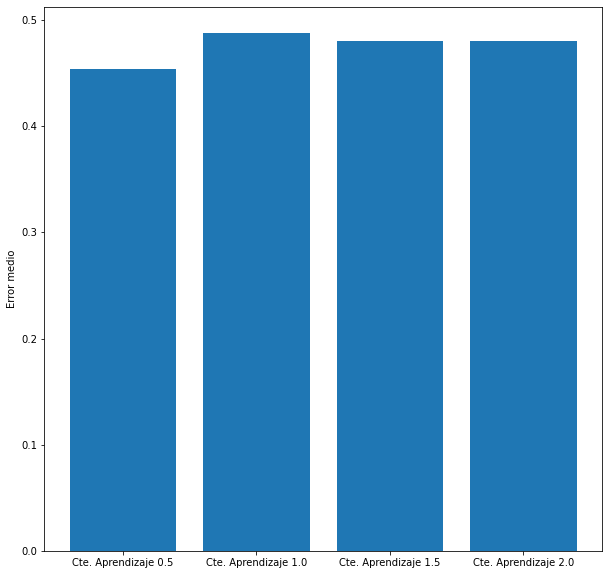

In [14]:
datos = (errorMedioWDBCVS, errorMedioWDBCVS)
utils.plot_histograms(datos, 100)

# EXPLICAR QUE CONSTANTE OFRECE MEJORES RESULTADOS WDBC
## 1.3 CONCLUSIÓN
Mencionar:
* pocas epoch malo
* muchas epoch malo (innecesario)
* Punto medio depende del problema y del dataset
* cte. aprendizaje mejor
* Como afecta la constante de aprendizaje (movimientos en los pesos más bruscos)
* Poca cte. implica más épocas
* Analogia balon cayendo sobre un valle y una canica para explicar la constante de aprendizaje

## 2. Resultados Regresión Logística (Implementación SKLearn)
De nuevo, se van a mostrar tablas con la tasa de error que cometen los modelos de **SKLearn**. En estos tests la constante de aprendizaje varía entre **[0.5-2]** (en pasos de 0.5), y el número de épocas varía desde **[10-2000]** (en pasos de 15 hasta 100, y en pasos de 100 hasta 2000).

Antes de mostrar los datos responderemos a la siguiente pregunta:

### Diferencia entre *LogisticRegression* y *SGDClassifier*

Responder diferencia

### Tablas *Logistic Regression* (sin cte aprendizaje)

In [15]:
errorMedioPimaVC_logistic, errorMedioPimaVS_logistic, errorMedioWDBCVC_logistic, errorMedioWDBCVS_logistic = utils.RL_test_SK_logistic(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10				Pima - Error		WDBC - Error
Validación Simple 25%			0.324074		0.535714
Validación Cruzada K-Folds=4		0.342593		0.428571
Validación Simple 20%			0.363636		0.533333
Validación Cruzada K-Folds=6		0.305556		0.503704
Validación Simple 15%			0.294118		0.444444
Validación Cruzada K-Folds=8		0.333791		0.446429
Validación Simple 10%			0.363636		0.416667
Validación Cruzada K-Folds=10		0.310909		0.503333

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=25*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=25				Pima - Error		WDBC - Error
Validación Simple 25%			0.296296		0.285714
Validación Cruzada K-Folds=4		0.324074		0.285714
Validación Simple 20%			0.363636		0.283333
Validación Cruzada K-Folds=6		0.361111		0.268519
Validación Simple 15%			0.352941		0.277778
Validación Cruzada K-Folds=8		0.343407		0.267857
Validación Simple 10%			0.409091		0.233333
Validación Cruzada K-Folds=10		0.340000		0.306667

*-*-*

### Tablas *SGBD Regression*

In [16]:
errorMedioPimaVC_SGBD, errorMedioPimaVS_SGBD, errorMedioWDBCVC_SGBD, errorMedioWDBCVS_SGBD = utils.RL_test_SK_SGBD(pima, wdbc)


*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=10*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=10 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.444444		0.410714
Validación Cruzada K-Folds=4			0.481481		0.517857
Validación Simple 20%				0.390909		0.500000
Validación Cruzada K-Folds=6			0.472222		0.464815
Validación Simple 15%				0.431373		0.407407
Validación Cruzada K-Folds=8			0.418269		0.500000
Validación Simple 10%				0.445455		0.600000
Validación Cruzada K-Folds=10			0.480000		0.463333
Test Épocas=10 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.342593		0.446429
Validación Cruzada K-Folds=4			0.472222		0.482143
Validación Simple 20%				0.381818		0.583333
Validación Cruzada K-Folds=6			0.407407		0.466667
Validación Simple 15%				0.411765		0.462963
Validación Cruzada K-Folds=8			0.388736		0.482143
Validación Simple 10%				0.454545		0.366667
Validación Cruzada K-Folds=10			0.377273		0.463333
Test Épocas=10 Constante ap

Validación Simple 20%				0.436364		0.600000
Validación Cruzada K-Folds=6			0.425926		0.372222
Validación Simple 15%				0.362745		0.462963
Validación Cruzada K-Folds=8			0.400412		0.517857
Validación Simple 10%				0.418182		0.533333
Validación Cruzada K-Folds=10			0.397273		0.463333

*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*Épocas=70*-*-*-**-*-*-**-*-*-**-*-*-**-*-**-*
Test Épocas=70 Constante aprendizaje=0.5	Pima - Error		WDBC - Error
Validación Simple 25%				0.370370		0.446429
Validación Cruzada K-Folds=4			0.398148		0.517857
Validación Simple 20%				0.509091		0.400000
Validación Cruzada K-Folds=6			0.416667		0.446296
Validación Simple 15%				0.421569		0.407407
Validación Cruzada K-Folds=8			0.436813		0.517857
Validación Simple 10%				0.390909		0.466667
Validación Cruzada K-Folds=10			0.394545		0.496667
Test Épocas=70 Constante aprendizaje=1.0	Pima - Error		WDBC - Error
Validación Simple 25%				0.500000		0.464286
Validación Cruzada K-Folds=4			0.453704		0.482143
Validación Simple 20%				0.

### 2.1 Efecto del número de épocas.
A continuación se mostrarán varias gráficas en las cuales se puede ver la evolución del error con respecto al valor del número de épocas asignado para el entrenamiento.
#### 2.1.1 *LogisticRegression Pima-Indians-Diabetes*

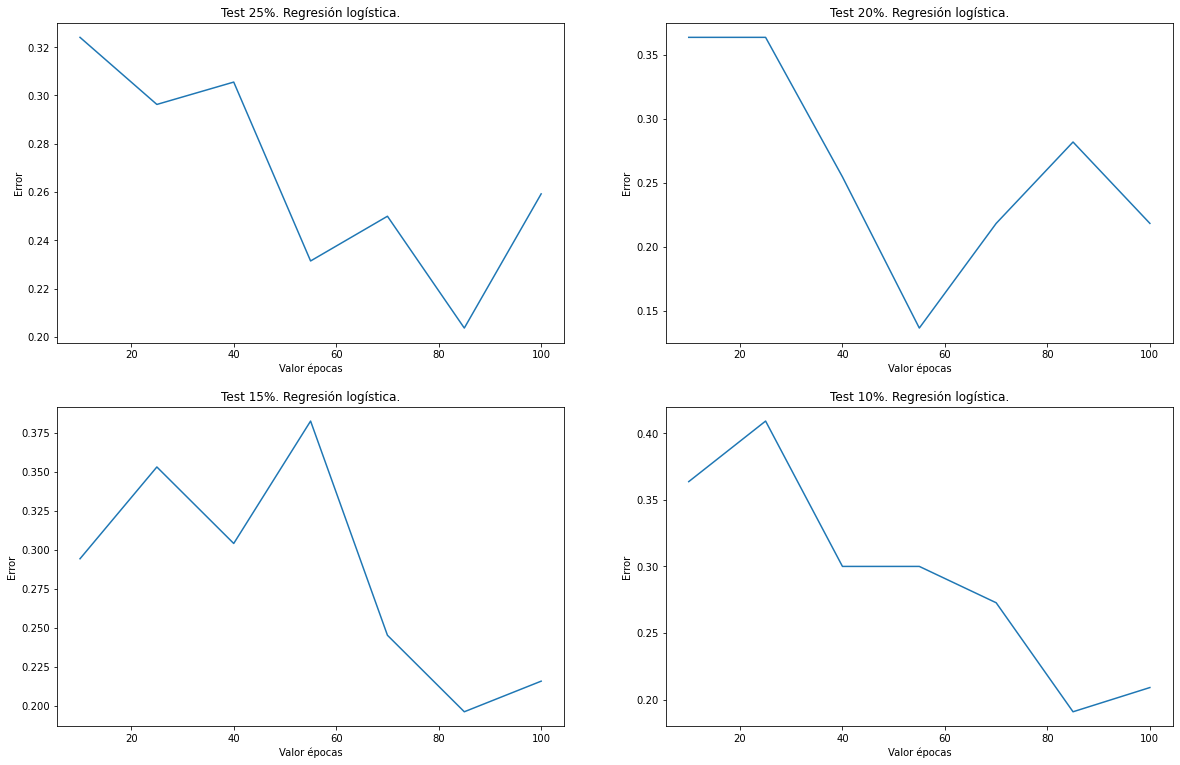

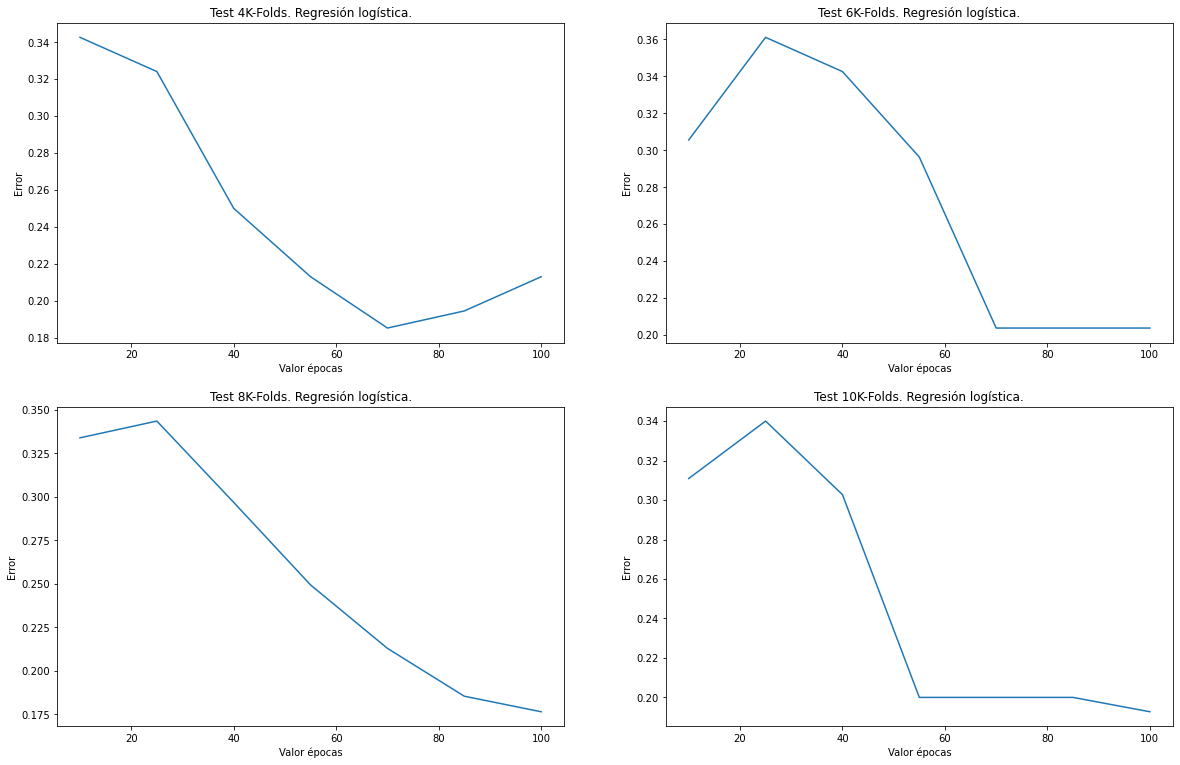

In [17]:
utils.plot_logistic(errorMedioPimaVS_logistic, True)
utils.plot_logistic(errorMedioPimaVC_logistic, False)

#### 2.1.2 *LogisticRegression WDBC*

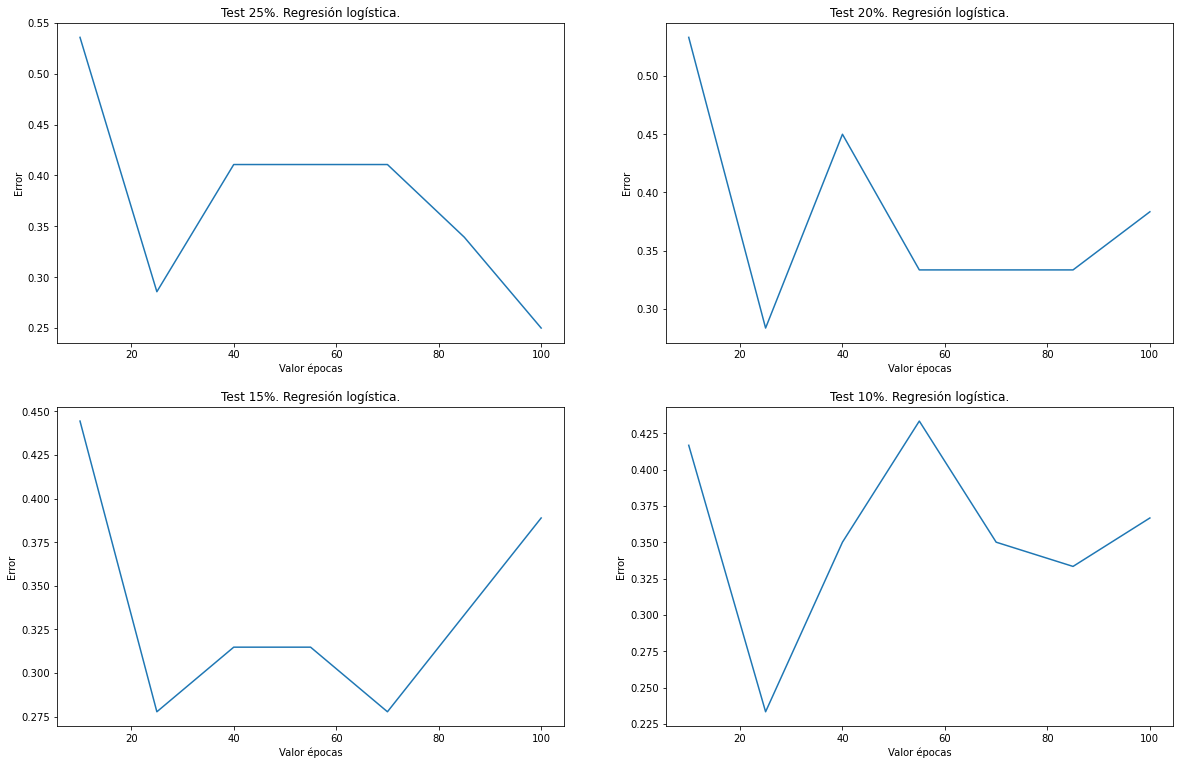

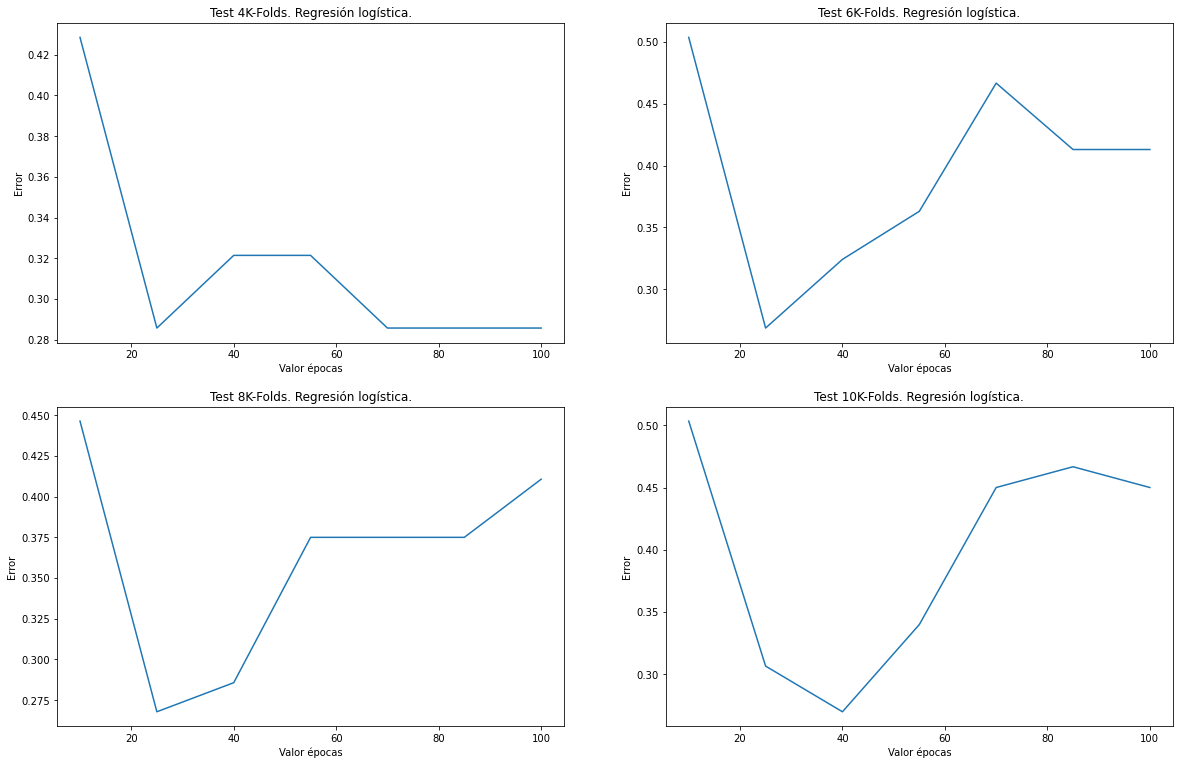

In [18]:
utils.plot_logistic(errorMedioWDBCVS_logistic, True)
utils.plot_logistic(errorMedioWDBCVC_logistic, False)

#### 2.1.1.1 *SGBD Classifier Pima-Indians-Diabetes* Cte. aprendizaje=0.5

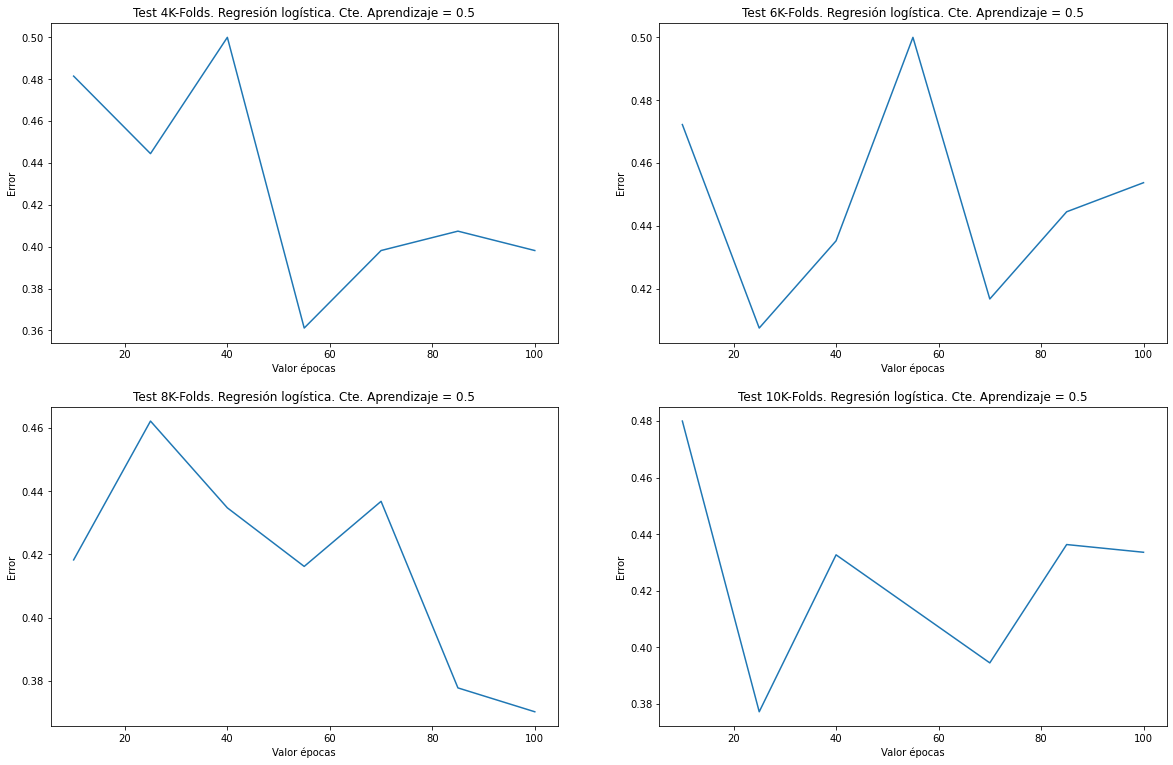

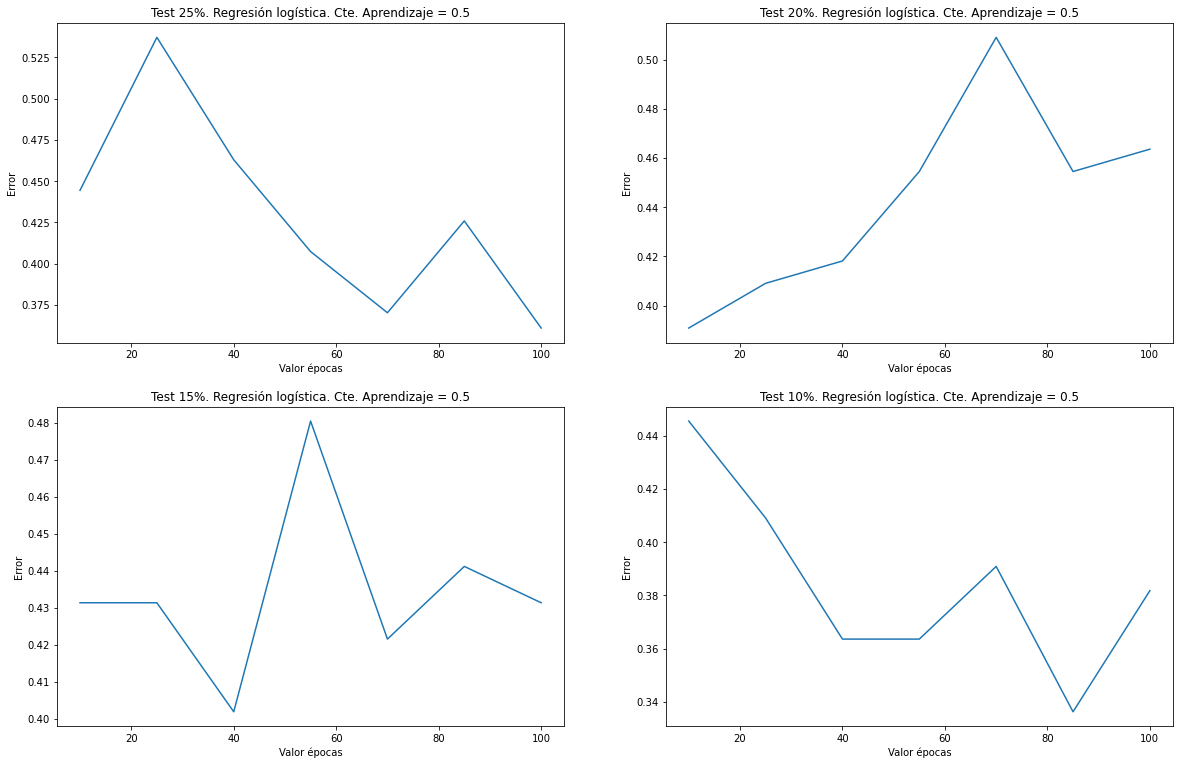

In [19]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 0.5, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 0.5, True)

#### 2.1.1.2 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=1.0

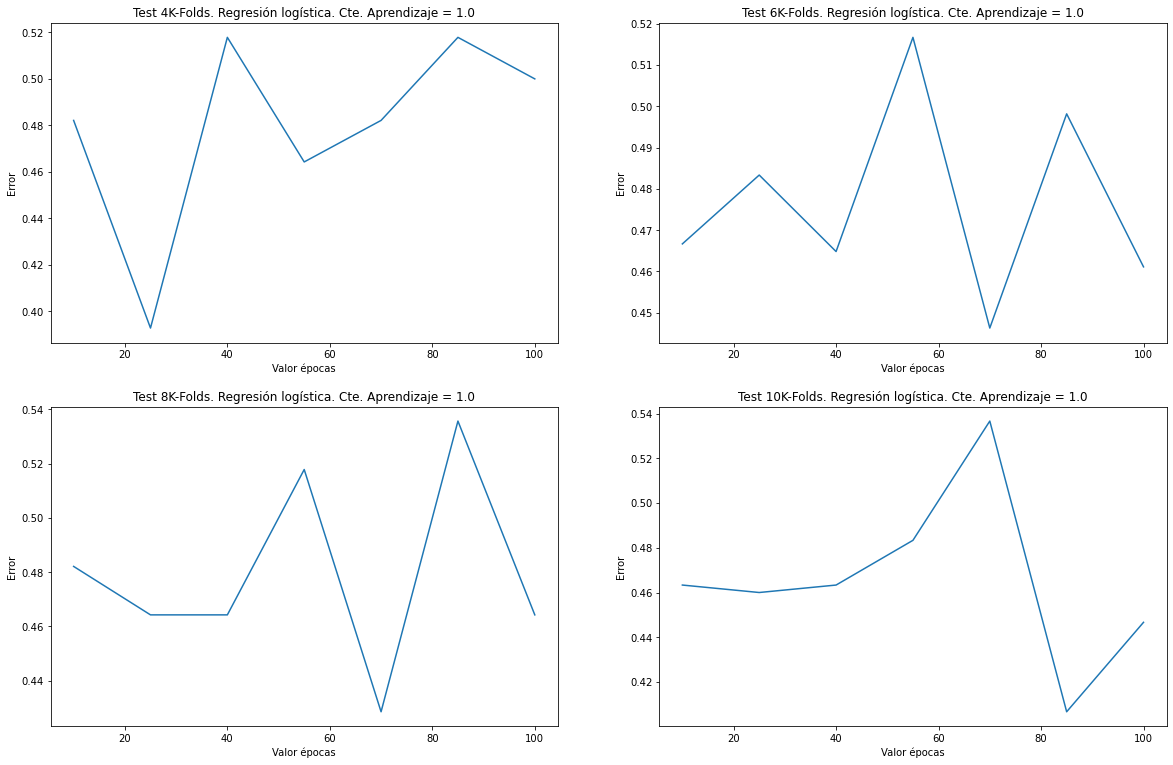

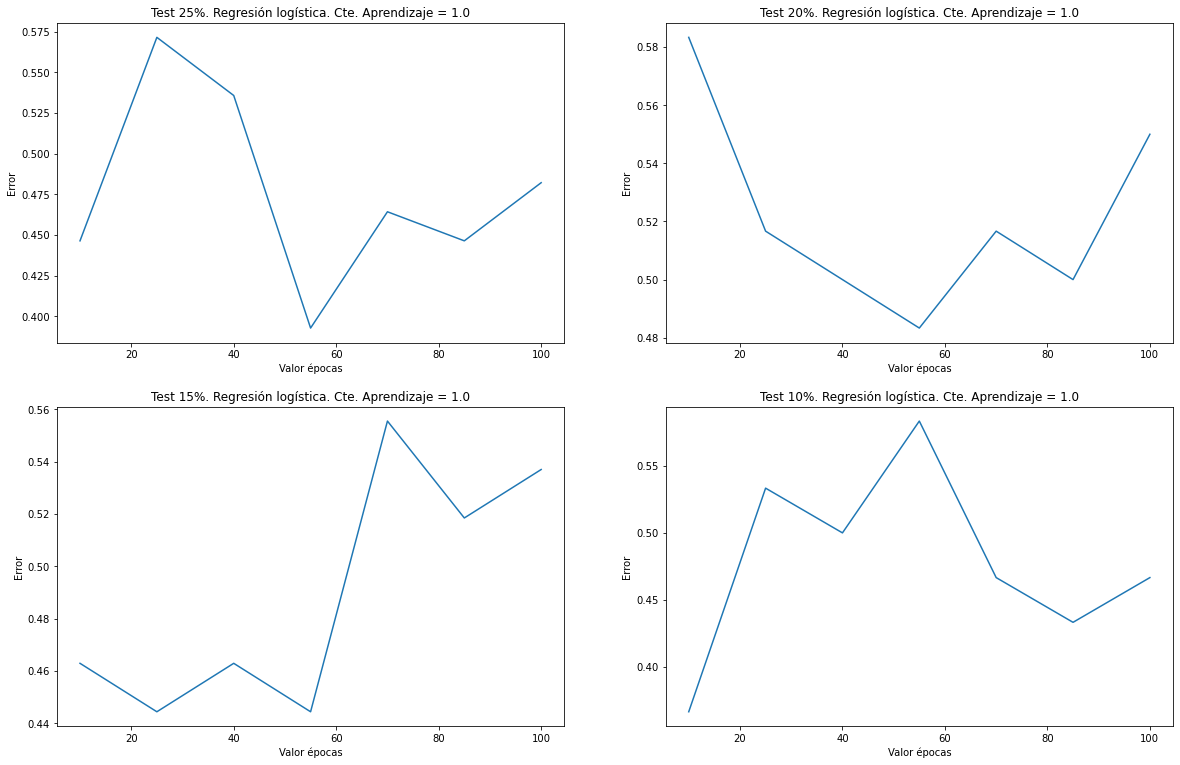

In [20]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.0, True)

#### 2.1.1.3 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=1.5

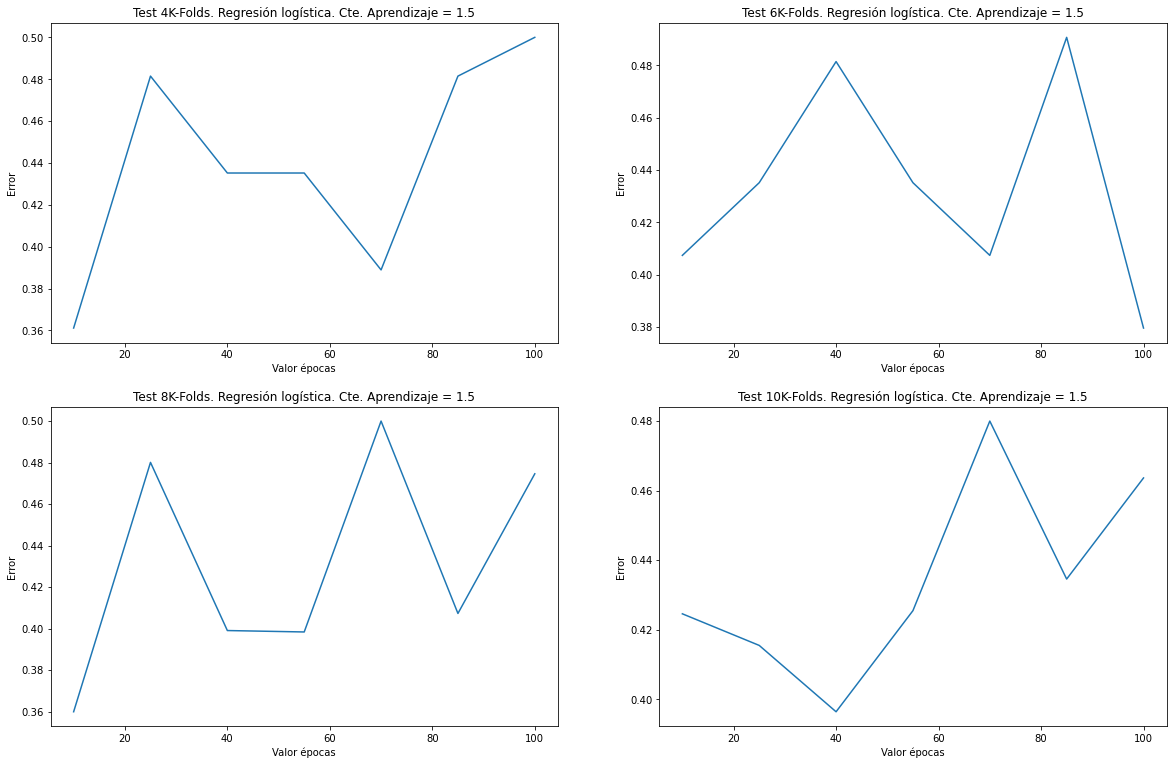

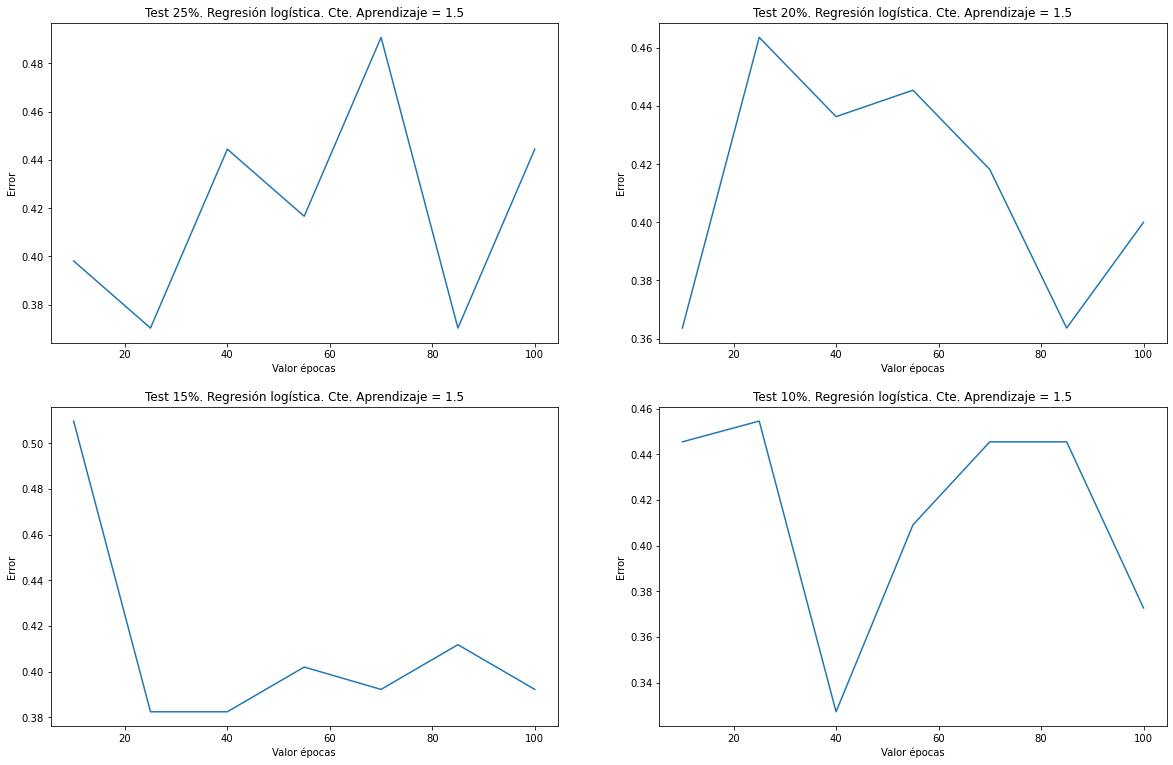

In [21]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 1.5, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 1.5, True)

#### 2.1.1.4 *SGBD Classifier  Pima-Indians-Diabetes* Cte. aprendizaje=2.0

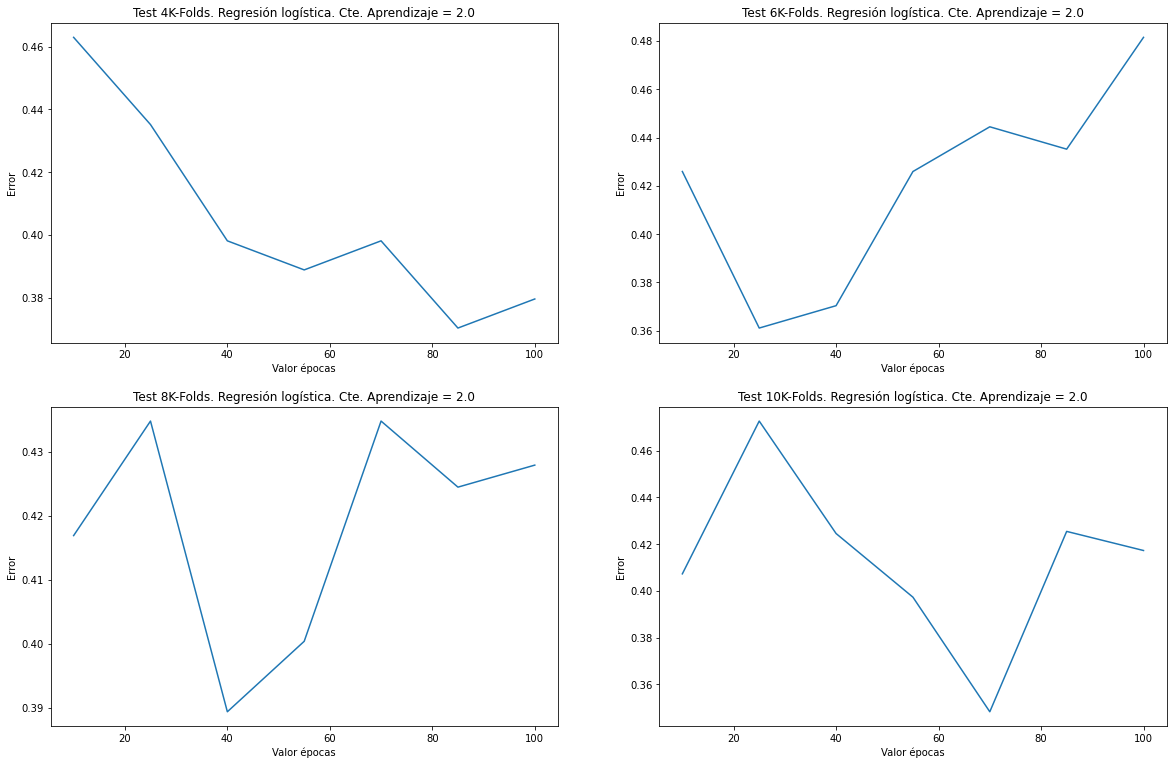

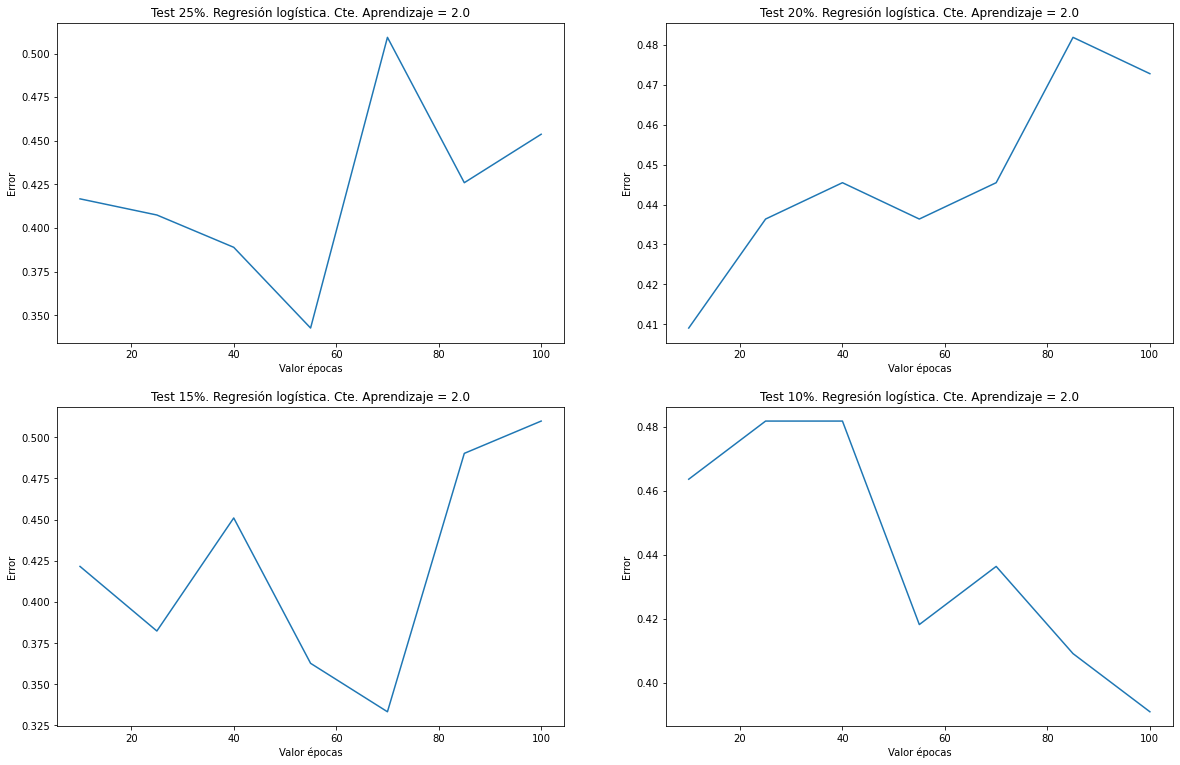

In [22]:
utils.plot_epoch(errorMedioPimaVC_SGBD, 2.0, False)
utils.plot_epoch(errorMedioPimaVS_SGBD, 2.0, True)

#### 2.1.2.1 *SGBD Classifier WDBC* Cte. aprendizaje=0.5

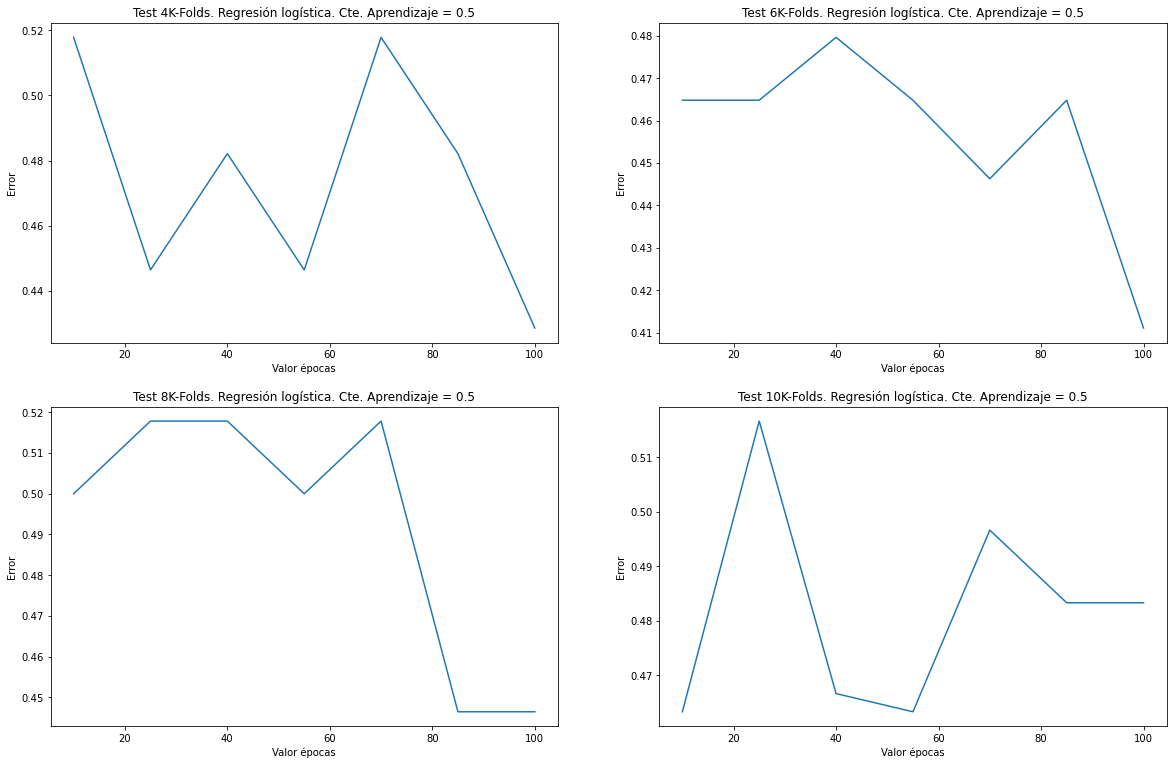

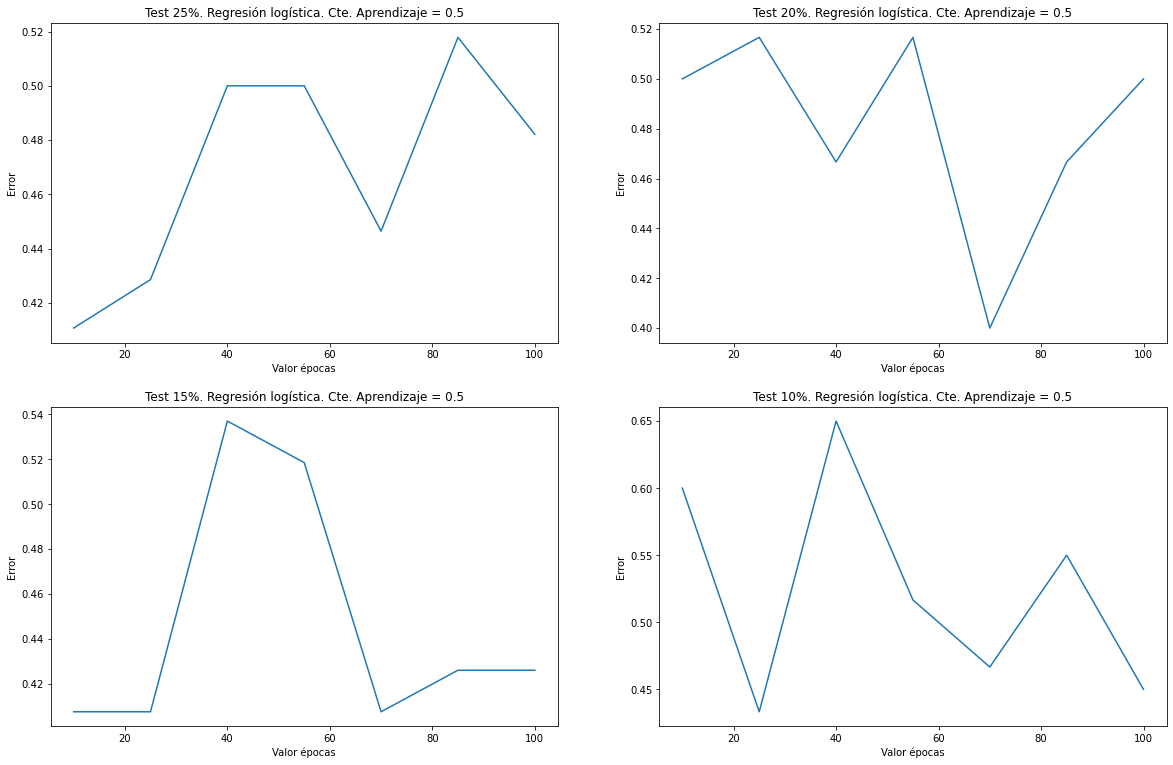

In [23]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 0.5, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 0.5, True)

#### 2.1.2.2 *SGBD Classifier WDBC* Cte. aprendizaje=1.0

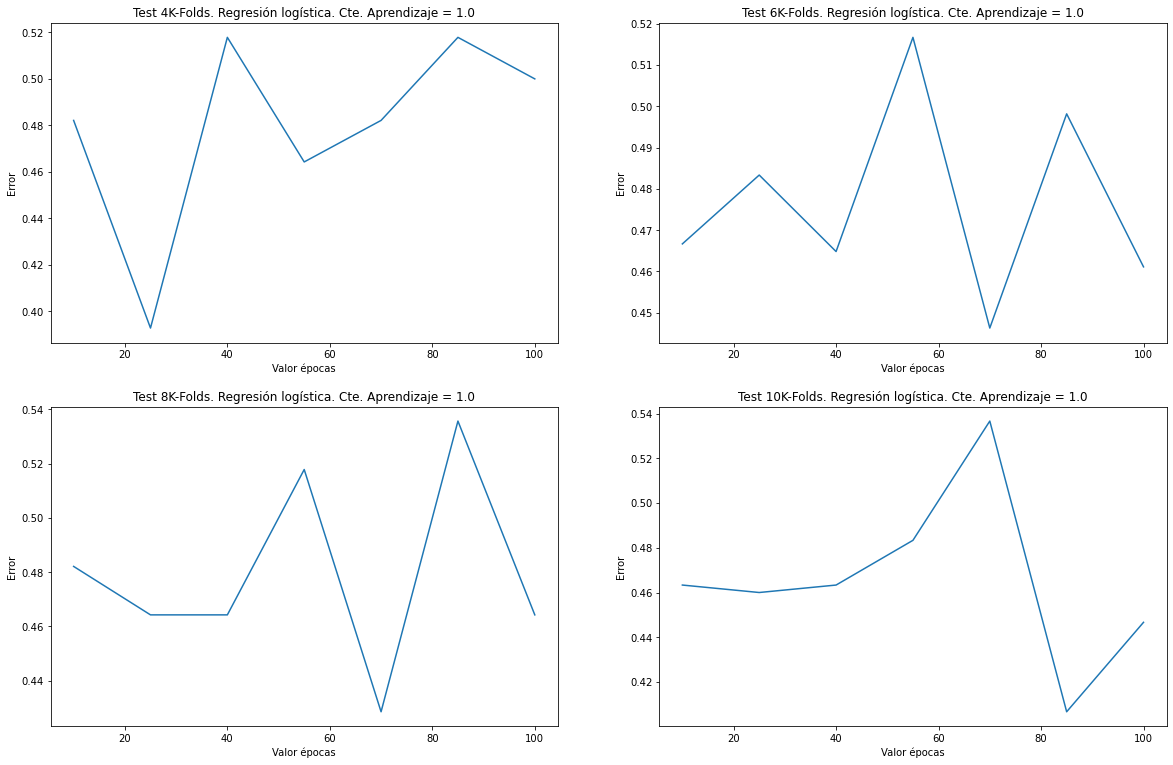

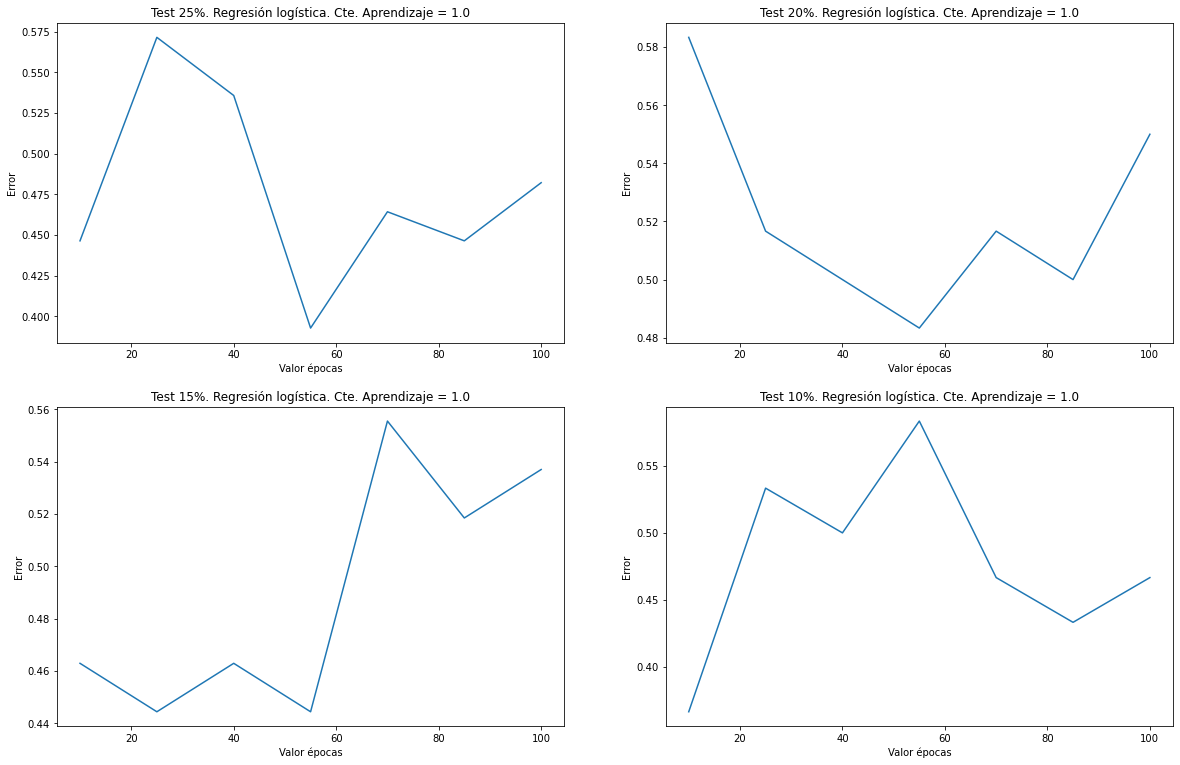

In [24]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.0, True)

#### 2.1.2.3 *SGBD Classifier WDBC* Cte. aprendizaje=1.5

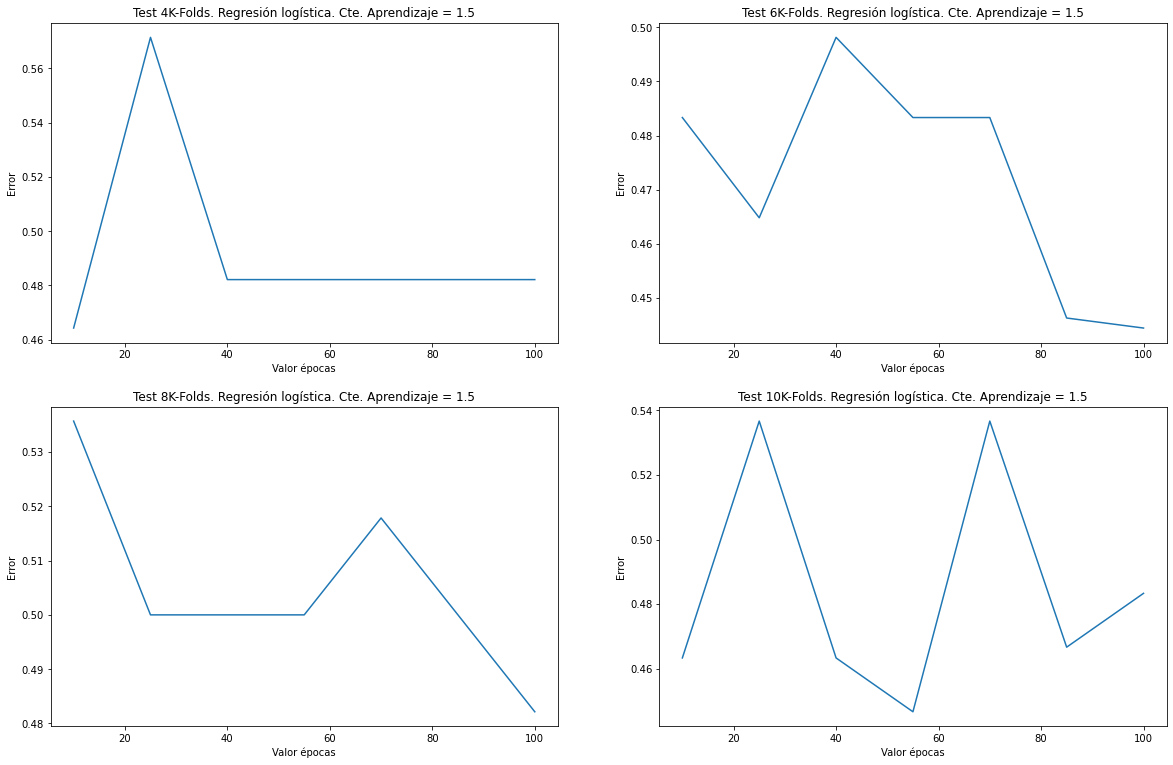

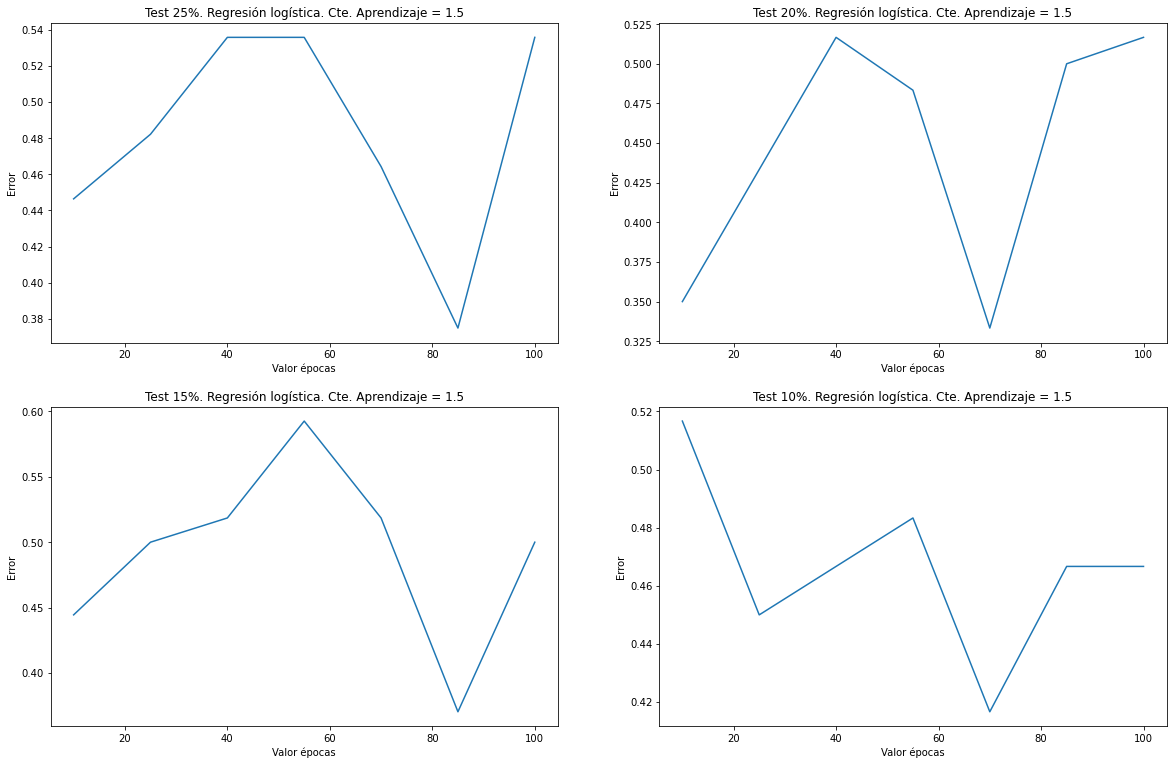

In [25]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 1.5, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 1.5, True)

#### 2.1.2.4 *SGBD Classifier WDBC* Cte. aprendizaje=2.0

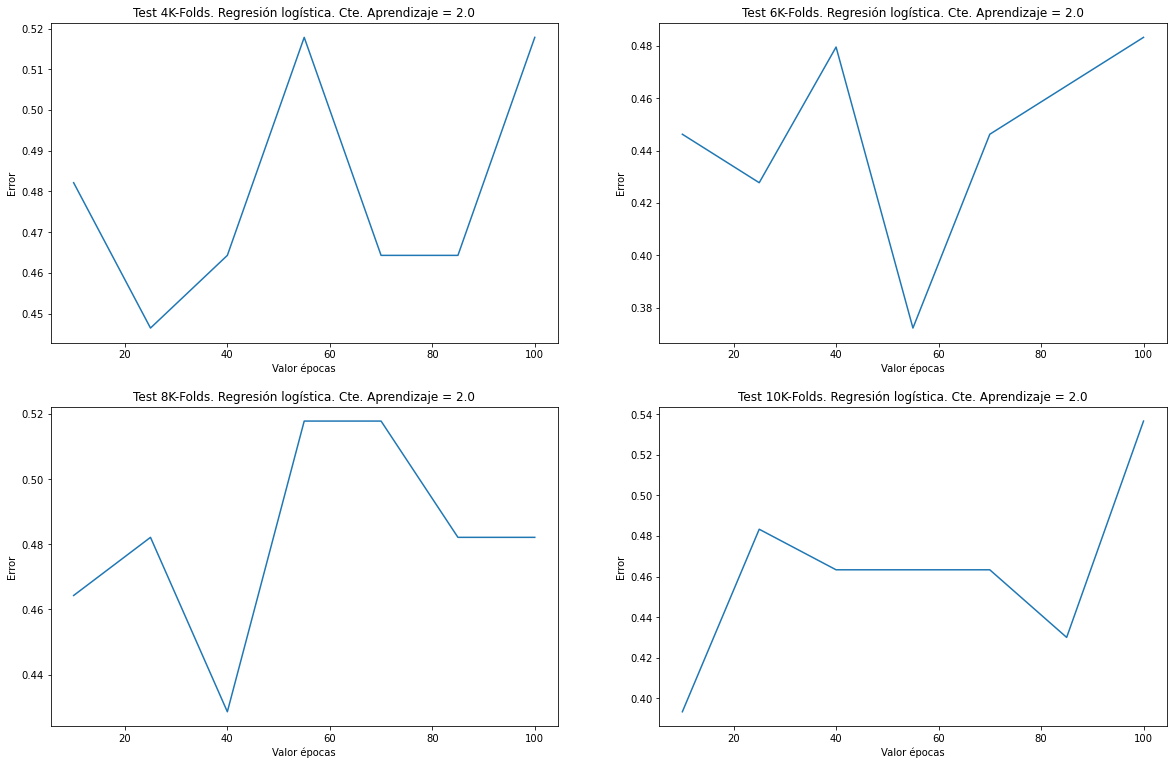

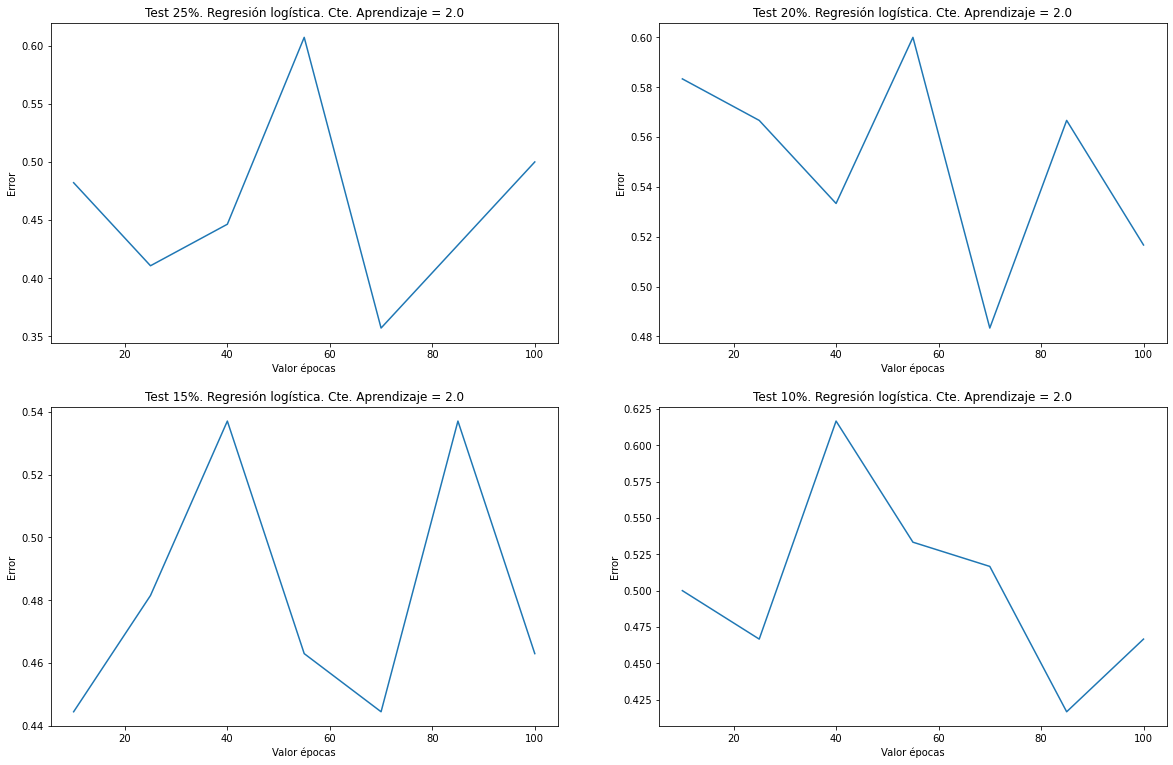

In [26]:
utils.plot_epoch(errorMedioWDBCVC_SGBD, 2.0, False)
utils.plot_epoch(errorMedioWDBCVS_SGBD, 2.0, True)

# Explicación resultados en SKLearn

### 2.2 Efecto de la constante de aprendizaje.
Ahora veremos como se desarrolla el error en base al valor que se le da a la constante de aprendizaje. Para esto se usará un determinado número de épocas (donde se da un menor error), de esta forma se vera el impacto de la cte.

Como con *LogisticRegression* no podemos establecer el aprendizaje **unicamente se mostrarán los datos con el clasificador SGBD**.
#### 2.2.1 *SGBD Classifier Pima-Indians-Diabetes*

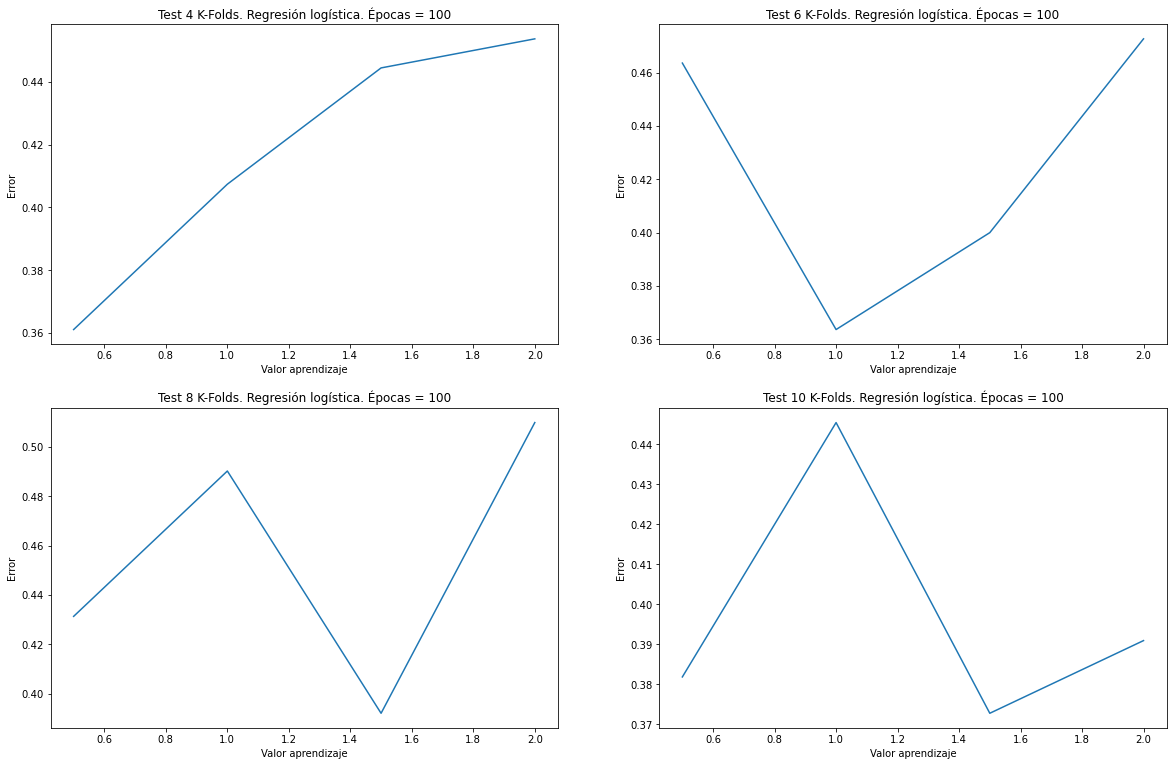

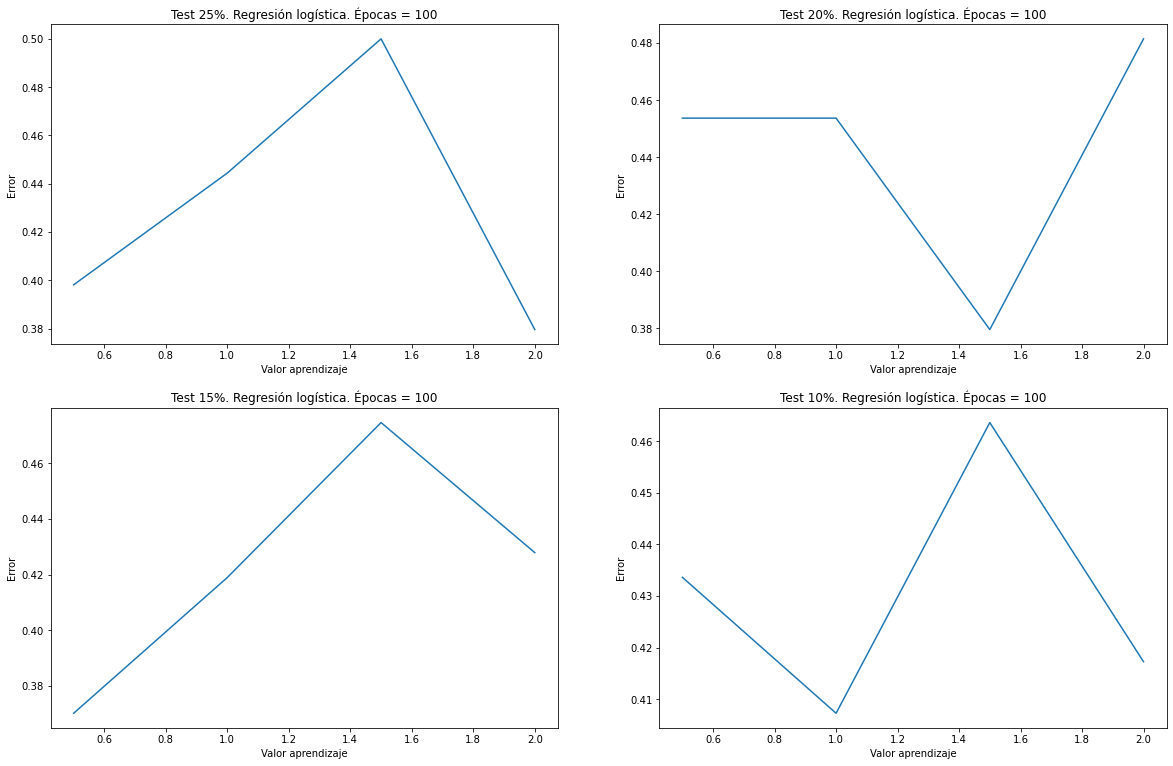

In [27]:
utils.plot_aprendizaje(errorMedioPimaVS_SGBD, 100, False)
utils.plot_aprendizaje(errorMedioPimaVC_SGBD, 100, True)

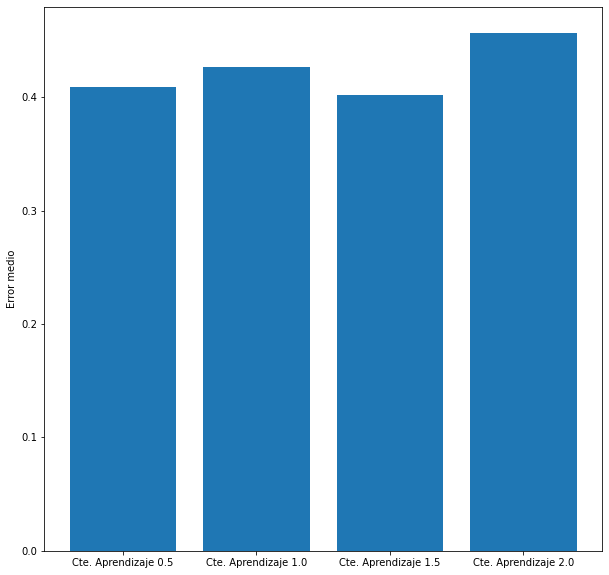

In [28]:
datos = (errorMedioPimaVS_SGBD, errorMedioPimaVS_SGBD)
utils.plot_histograms(datos, 100)

#### 2.2.2 *SGBD Classifier WDBC*

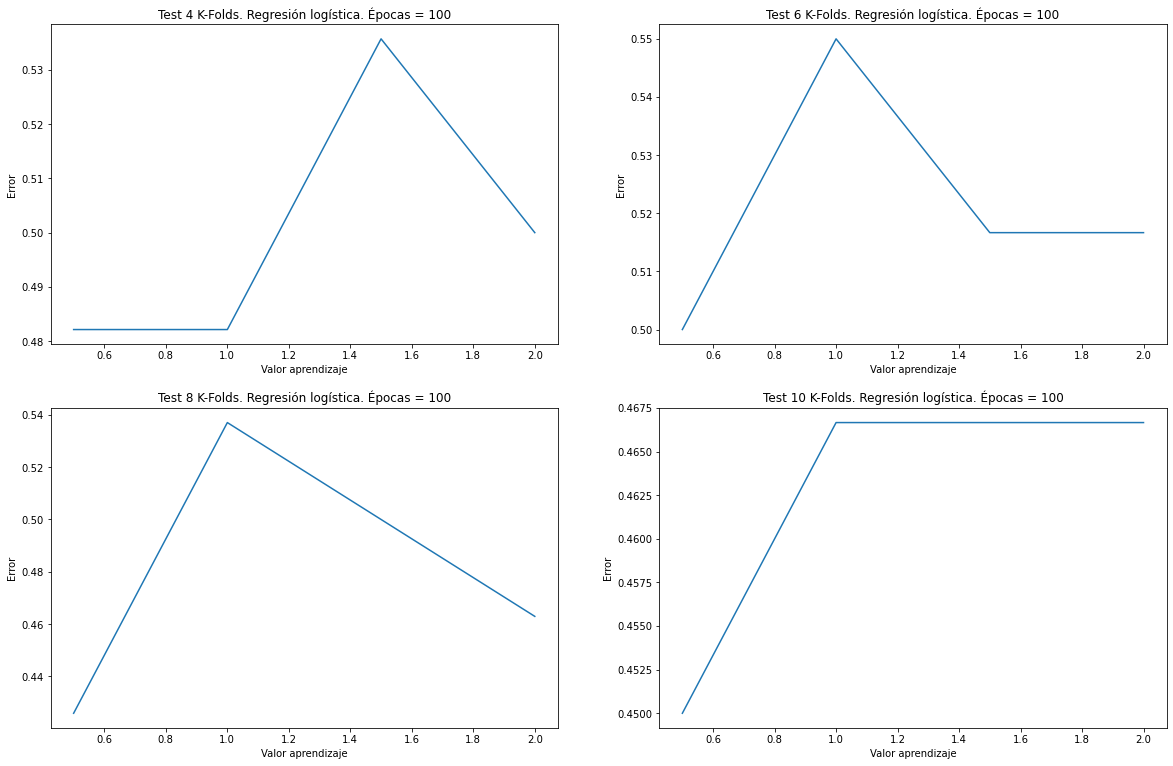

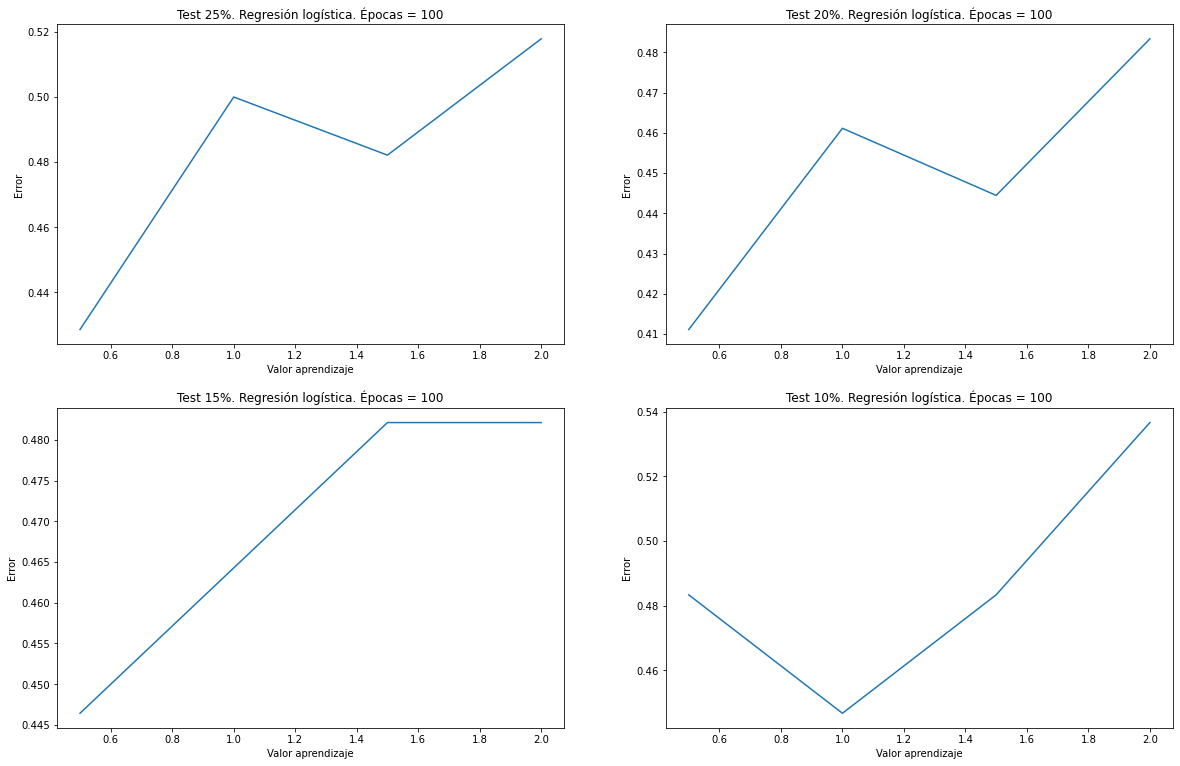

In [29]:
utils.plot_aprendizaje(errorMedioWDBCVS_SGBD, 100, False)
utils.plot_aprendizaje(errorMedioWDBCVC_SGBD, 100, True)

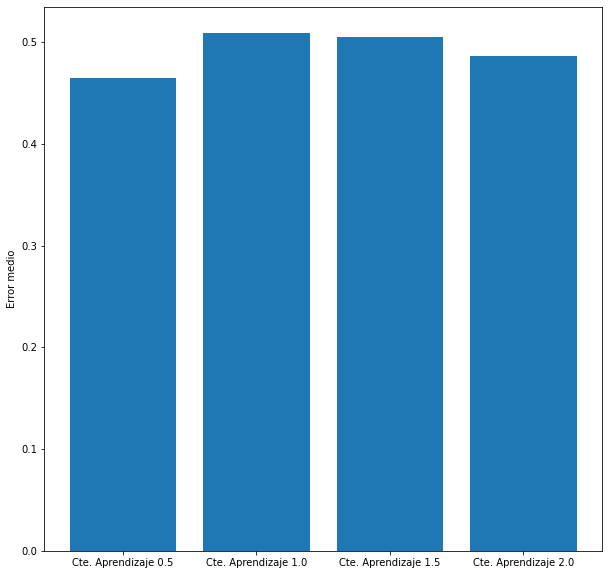

In [30]:
datos = (errorMedioWDBCVS_SGBD, errorMedioWDBCVS_SGBD)
utils.plot_histograms(datos, 100)

# Explicar resultados cte aprendizaje sgbd

# Conclusion SKLearn
* Mencionar el funcionamiento de logistic regression y que no acepta cte.
* Mencionar el comportamiento de ambas

### 2.3 Comparación implementación SKLearn e implementación propia
Como *LogisticRegression* no tiene un parametro de cte. aprendizaje, los datos de este no cambian, pero los de los demás modelos sí.
#### 2.3.1 *Pima-Indians-diabetes*

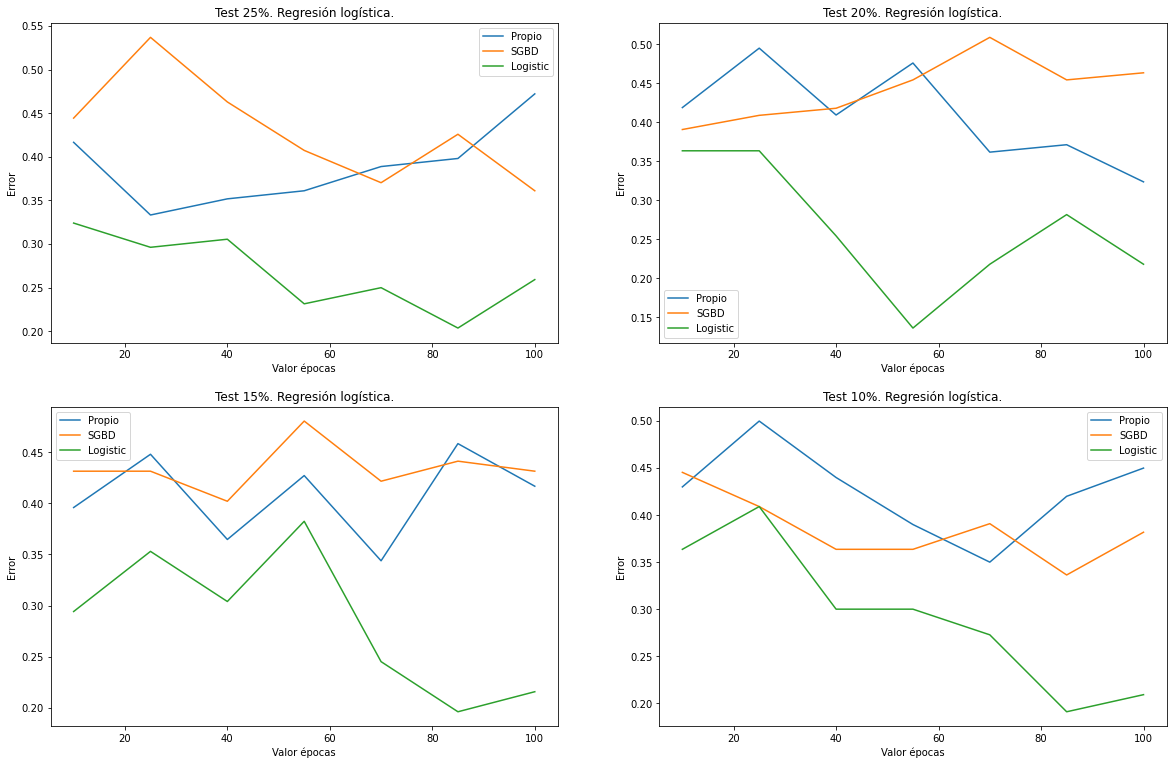

In [31]:
datos = (errorMedioPimaVS, errorMedioPimaVS_SGBD, errorMedioPimaVS_logistic)
labels = ["Propio", "SGBD", "Logistic"] 

utils.plot_VS_all(datos, 0.5, True, labels)

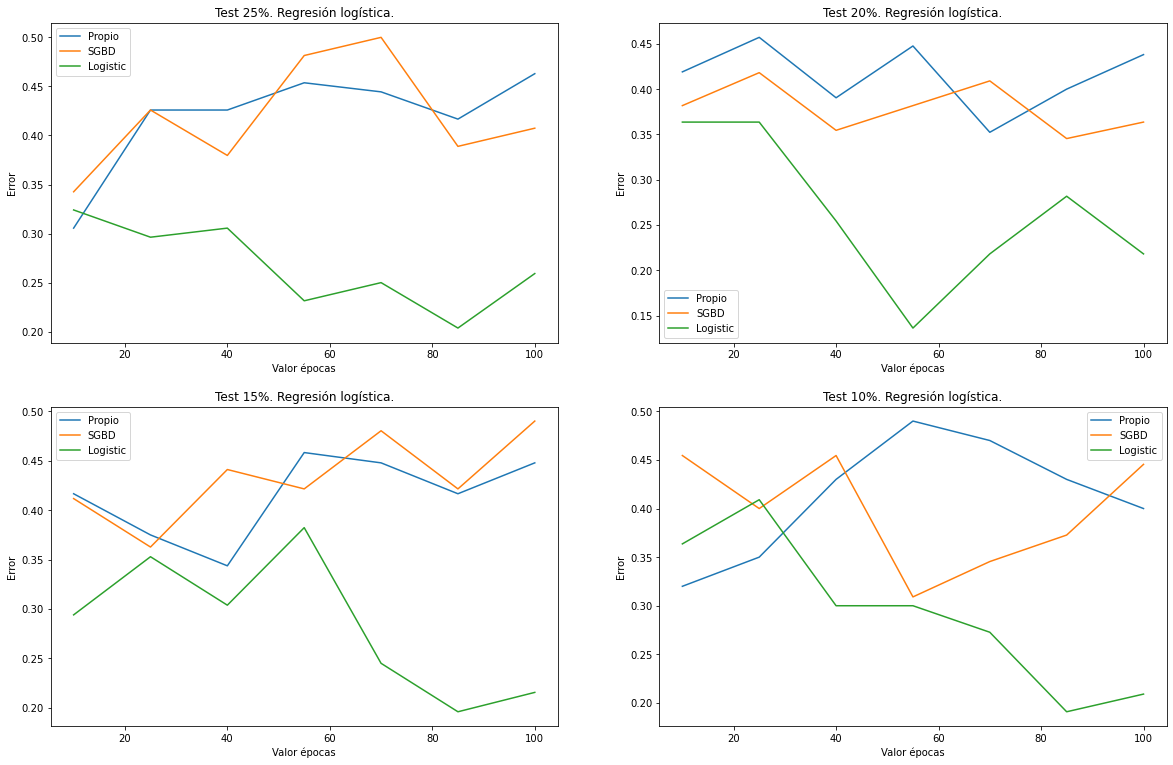

In [32]:
utils.plot_VS_all(datos, 1.0, True, labels)

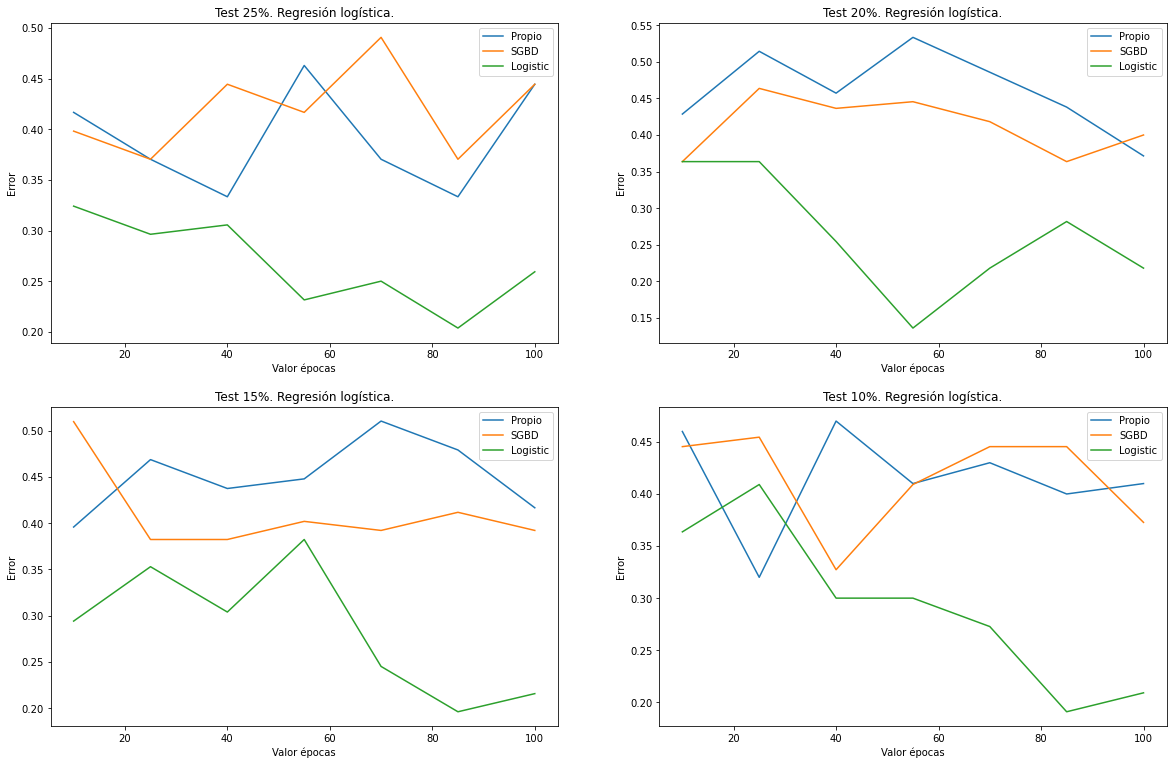

In [33]:
utils.plot_VS_all(datos, 1.5, True, labels)

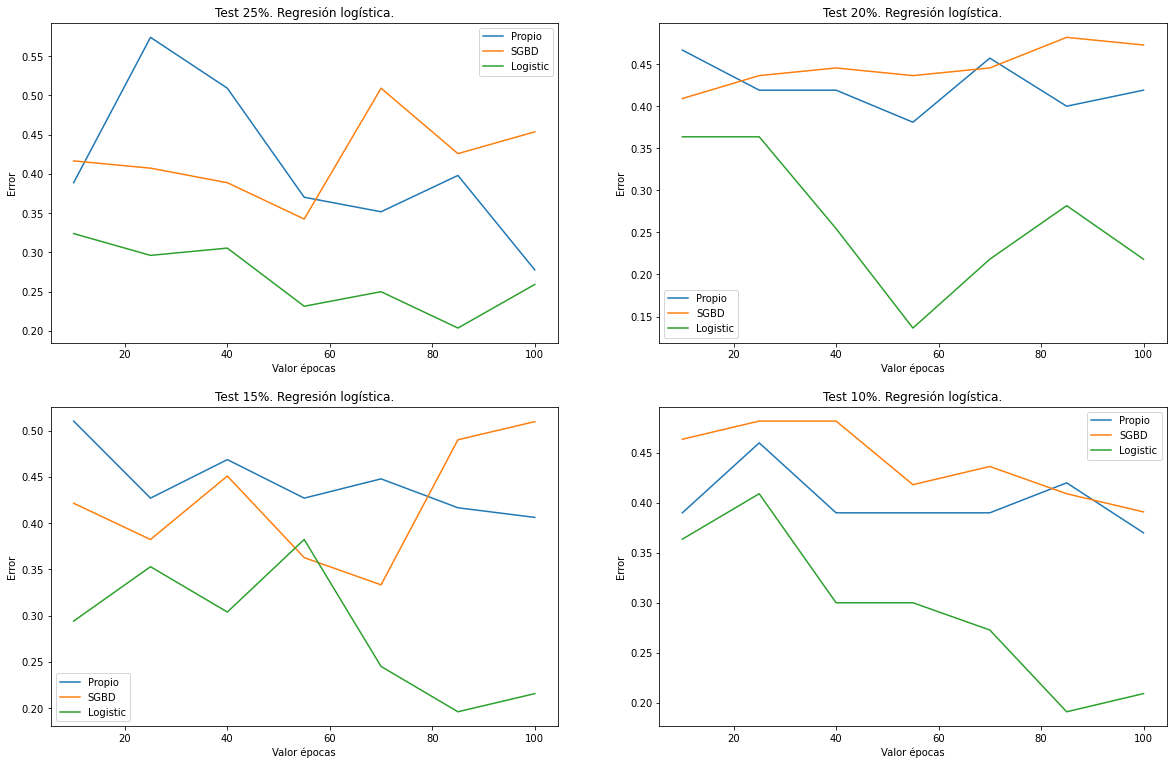

In [34]:
utils.plot_VS_all(datos, 2.0, True, labels)

# Explicar resultados con pima
#### 2.3.2 *WDBC*

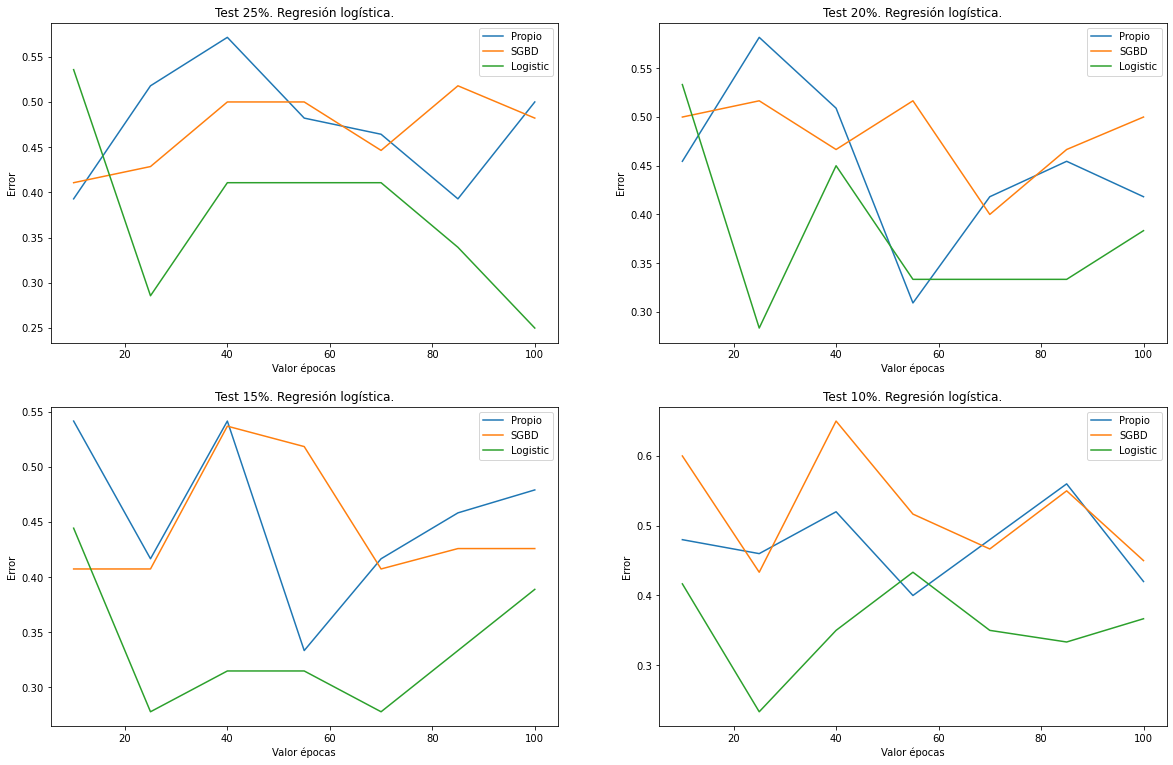

In [35]:
datos = (errorMedioWDBCVS, errorMedioWDBCVS_SGBD, errorMedioWDBCVS_logistic)
utils.plot_VS_all(datos, 0.5, True, labels)

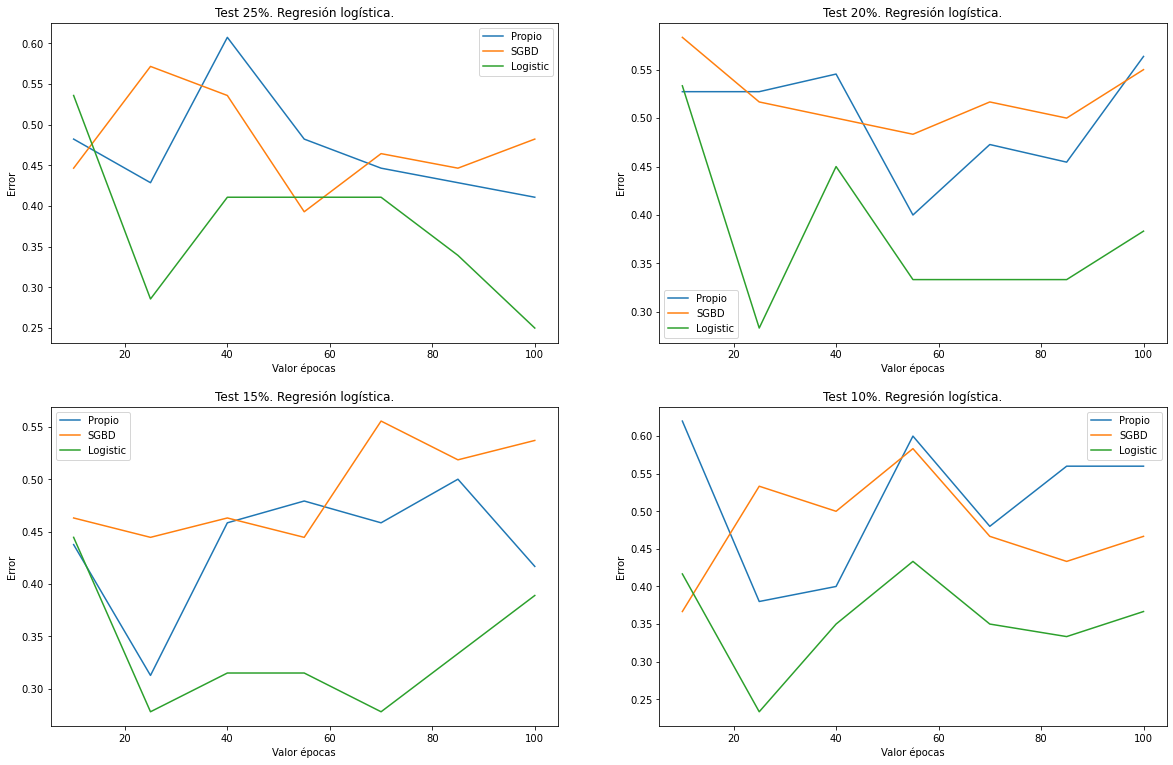

In [36]:
utils.plot_VS_all(datos, 1.0, True, labels)

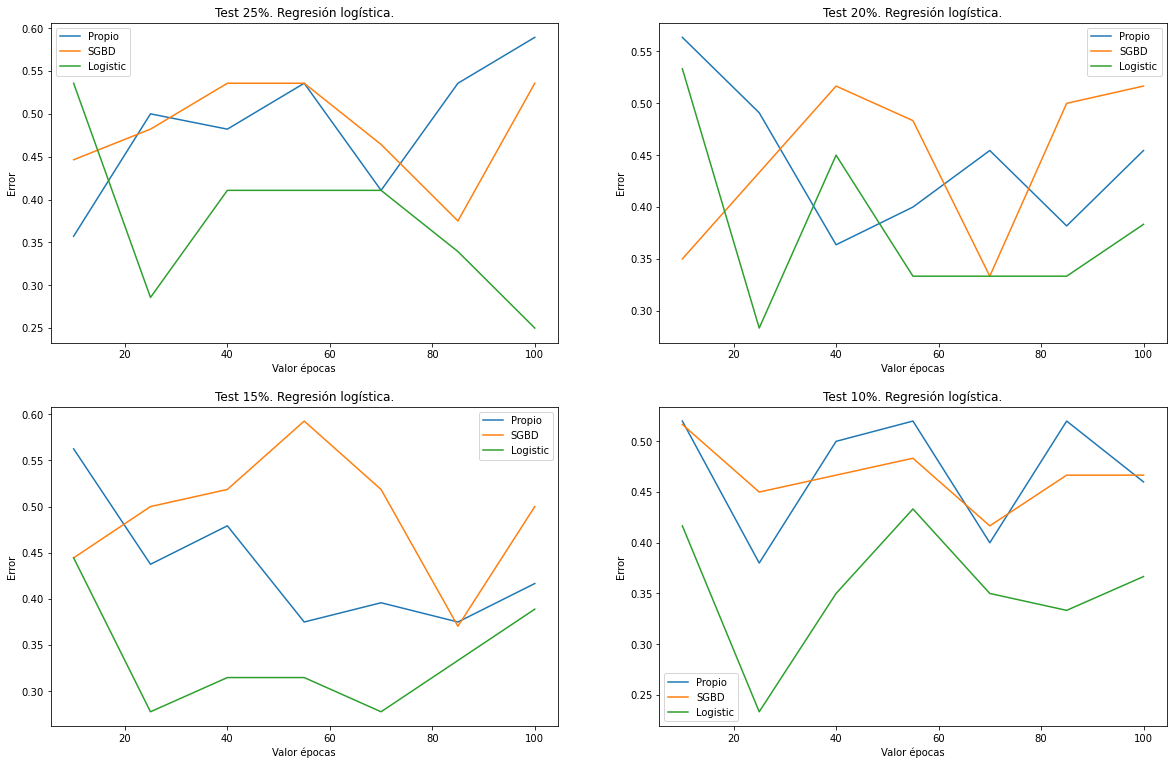

In [37]:
utils.plot_VS_all(datos, 1.5, True, labels)

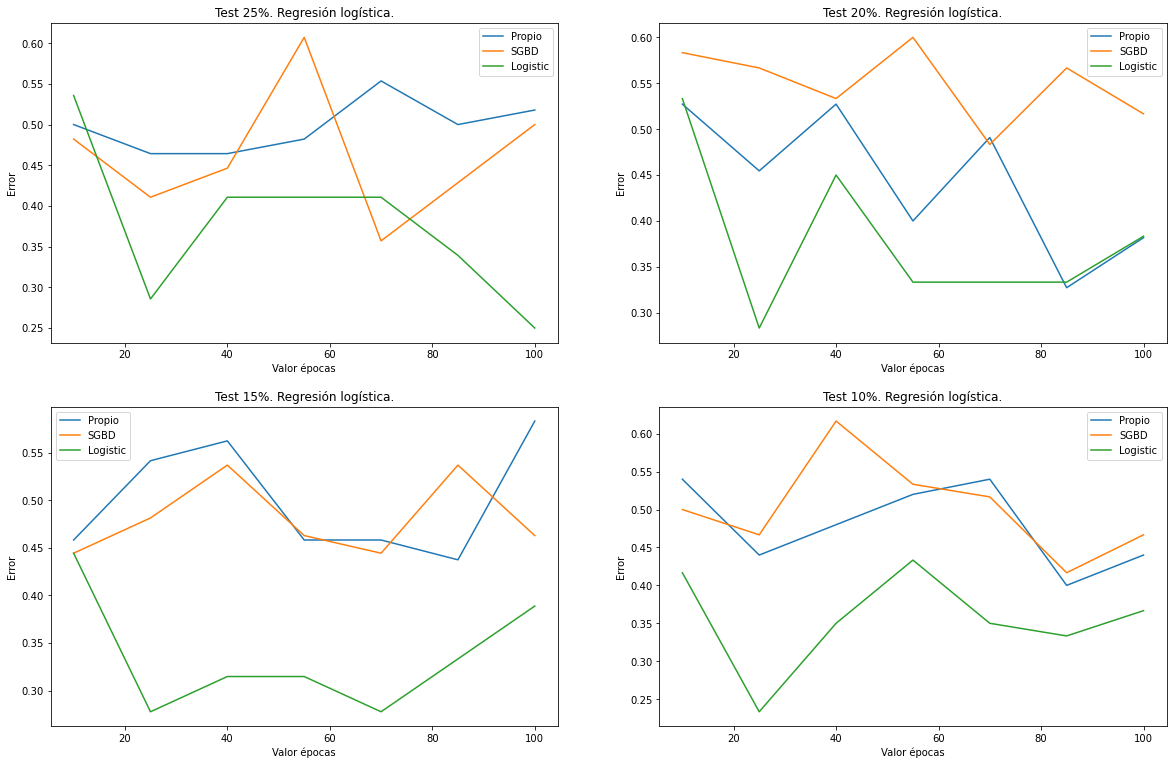

In [38]:
utils.plot_VS_all(datos, 2.0, True, labels)

# Explicar resultados con WDBC
# Conclusion comparación
## 3. Análisis ROC
A continuación se mostrarán los espacios ROC de cada conjunto de datos


In [43]:
from Distancias import distanciaEuclidea

# Configuraciones de los modelos
RL_conf = (1, 1000) # cte. aprendizaje, épocas
KNN_conf = (11, distanciaEuclidea) # K, funcion distancia

### 3.1 *Pima-Indians-Diabetes*

No handles with labels found to put in legend.


<Figure size 1440x1440 with 0 Axes>

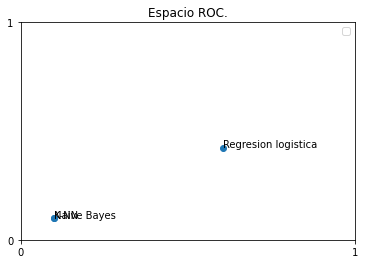

In [45]:
utils.plot_espacio_ROC(pima, 10, 20, RL_conf, KNN_conf)

# ANálisis espacio ROC en pima

### 3.2 *WDBC*

No handles with labels found to put in legend.


<Figure size 1440x1440 with 0 Axes>

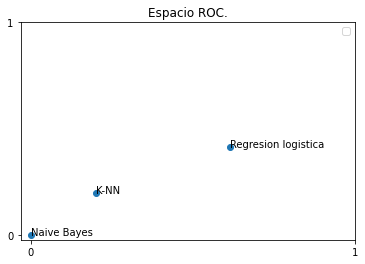

In [46]:
utils.plot_espacio_ROC(wdbc, 10, 20, RL_conf, KNN_conf)

# Analisis espacio ROC en WDBC

## 4. Curva ROC